In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Load dataset from: https://drive.google.com/file/d/1P61KzkMYtzHemvlYNfKrTjOvXj7yPQT4/view

In [2]:
dataset = pd.read_csv('eie_preprocessed.csv')

/home/olha/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3331: DtypeWarning: Columns (7,8,9,10,11,12,13,14,17,18,19,20,22,26,31,35,39,40,41,43,44,45,46,47,48,49,51,52,53,54,55,56,57,59,60,61,62,63,64,65,67,68,69,70,71,72,74,75,76,77,78,79,81,82,83,84,85,86,88,89,90,91,92,93,95,96,97,98,99,100,102,103,104,105,110,111,128,130,132,134,137,138,143,144,145,146,147,148) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
dataset.head()

,outid,birth,sextypename,regname,areaname,tername,regtypename,eoname,eotypename,eoregname,...,ukrlangball12,ukrlangball,ukrlangadaptscale,ukrlangptname,ukrlangptregname,ukrlangptareaname,ukrlangpttername,mathdpalevel,testdate,regtypename_detailed
0,a99c6c63-aa70-4aec-ba42-370f7261e857,1998,чоловіча,Запорізька область,Мелітопольський район,с.Терпіння,Випускник української школи поточного року,"Терпіннівський колегіум ""Джерело"" Мелітопольсь...",колегіум,Запорізька область,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Випускник української школи поточного року
1,c3136421-569e-422e-ae8f-41c4c931fd70,1998,жіноча,Хмельницька область,Красилівський район,м.Красилів,Випускник української школи поточного року,Красилівська загальноосвітня школа I-III ступе...,середня загальноосвітня школа,Хмельницька область,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Випускник української школи поточного року
2,fbd0e280-4b77-4f34-942d-00bc850c2992,1995,жіноча,Дніпропетровська область,Петропавлівський район,с.Дмитрівка,Випускник минулих років,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Випускник минулих років
3,30de395e-7a74-452a-8370-6856d240fbfb,1999,чоловіча,Чернівецька область,м.Чернівці,Шевченківський район міста,Випускник української школи поточного року,Чернівецька спеціалізована школа І-ІІІ ступені...,спеціалізована школа,Чернівецька область,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Випускник української школи поточного року
4,52a40c74-374e-4744-bd6f-938ab7a4a641,1997,чоловіча,Миколаївська область,Врадіївський район,с.Кумарі,Учень коледжу закладу професійної (професійно-...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
print(list(dataset.columns))

['outid', 'birth', 'sextypename', 'regname', 'areaname', 'tername', 'regtypename', 'eoname', 'eotypename', 'eoregname', 'eoareaname', 'eotername', 'eoparent', 'ukrtest', 'ukrteststatus', 'ukrball100', 'ukrball12', 'ukrptname', 'ukrptregname', 'ukrptareaname', 'ukrpttername', 'histtest', 'histlang', 'histteststatus', 'histball100', 'histball12', 'histptname', 'histptregname', 'histptareaname', 'histpttername', 'mathtest', 'mathlang', 'mathteststatus', 'mathball100', 'mathball12', 'mathptname', 'mathptregname', 'mathptareaname', 'mathpttername', 'phystest', 'physlang', 'physteststatus', 'physball100', 'physptname', 'physptregname', 'physptareaname', 'physpttername', 'chemtest', 'chemlang', 'chemteststatus', 'chemball100', 'chemptname', 'chemptregname', 'chemptareaname', 'chempttername', 'biotest', 'biolang', 'bioteststatus', 'bioball100', 'bioptname', 'bioptregname', 'bioptareaname', 'biopttername', 'geotest', 'geolang', 'geoteststatus', 'geoball100', 'geoptname', 'geoptregname', 'geopta

In [5]:
dataset.shape

(2201117, 150)

# Feature Description

Dataset contains 1,967,014 individuals and 128 features (general, test performance and school information)

## General features (demographic, educational etc.)

`outid` – unique identifier of the participant <br>
`birth` - the birth year of this individual. Analyse this only for each year of the test. <br>
`sextypename` – gender of the participant ['Male', 'Female']

In [6]:
print(f"Min birth year value:{dataset.birth.min()}")
print(f"Max birth year value:{dataset.birth.max()}")

Min birth year value:1944
Max birth year value:2009


In [7]:
dataset.sextypename.value_counts()

жіноча      1116364
чоловіча    1084753
Name: sextypename, dtype: int64

<AxesSubplot:>

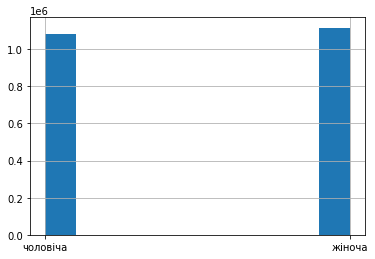

In [8]:
dataset.sextypename.hist()

`regname` – region of registration/residence of the participant in Ukraine (24 oblasts and Kyiv, the capital of the country)

In [9]:
sorted(dataset.regname.unique())

['Івано-Франківська область',
 'Волинська область',
 'Вінницька область',
 'Дніпропетровська область',
 'Донецька область',
 'Житомирська область',
 'Закарпатська область',
 'Запорізька область',
 'Київська область',
 'Кіровоградська область',
 'Луганська область',
 'Львівська область',
 'Миколаївська область',
 'Одеська область',
 'Полтавська область',
 'Рівненська область',
 'Сумська область',
 'Тернопільська область',
 'Харківська область',
 'Херсонська область',
 'Хмельницька область',
 'Черкаська область',
 'Чернівецька область',
 'Чернігівська область',
 'м.Київ']

<AxesSubplot:>

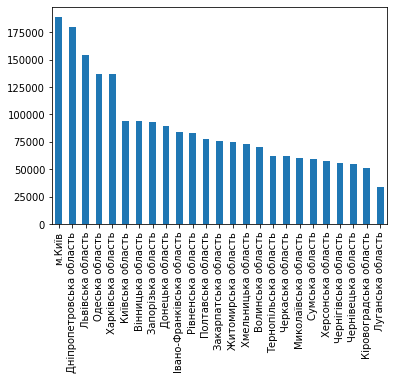

In [10]:
dataset.regname.value_counts().plot(kind='bar')

`areaname` – district/city of registration/residence of the participant<br>
`tername` – place of registration/residence of the participant

In [11]:
print(f"Number of unique areaname: {len(dataset.areaname.unique())}")
print(f"Number of unique tername: {len(dataset.tername.unique())}")

Number of unique areaname: 603
Number of unique tername: 18583


`regtypename` – status of the participant (5 types: 'A graduate of an Ukrainian school of the current year', 'A graduate of a school of the previous years', 'College student of a vocational or higher education institution', 'Penitentiary institution', 'A graduate of a foreign school')

In [12]:
pivot_df = dataset.groupby(['regtypename', 'year']).size().unstack()
pivot_df.loc['Total'] = pivot_df.sum()
pivot_df


year,2016,2017,2018,2019,2020,2021,2022
regtypename,,,,,,,
Випускник минулих років,48506.0,34424.0,29307.0,33103.0,42419.0,51009.0,36129.0
Випускник української школи поточного року,200726.0,192785.0,185373.0,187659.0,211195.0,219640.0,166252.0
Випускник іноземної школи,62.0,62.0,32.0,33.0,45.0,36.0,89.0
Установа виконання покарань,384.0,NaN,NaN,NaN,NaN,NaN,26.0
Учень коледжу закладу професійної (професійно-технічної) або вищої освіти,18324.0,13618.0,120975.0,133018.0,125640.0,118638.0,31608.0
Total,268002.0,240889.0,335687.0,353813.0,379299.0,389323.0,234104.0


<AxesSubplot:>

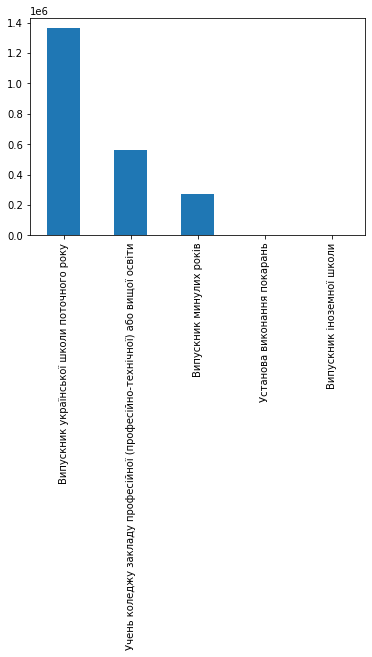

In [13]:
dataset.regtypename.value_counts().plot(kind='bar')

`regtypename_detailed` – status of the participant (6 types: 'A graduate of an Ukrainian school of the current year', 'A graduate of a school of the previous years', 'College student of a vocational','Student from higher education institution' 'Penitentiary institution', 'A graduate of a foreign school')

The main differencer from `regtypename` is that 'College student of a vocational or higher education institution' separate into 2 categories

In [14]:
pivot_df = dataset.groupby(['regtypename_detailed', 'year']).size().unstack()
pivot_df.loc['Total'] = pivot_df.sum()
pivot_df

year,2016,2017,2018,2019,2020,2021,2022
regtypename_detailed,,,,,,,
Випускник минулих років,48506.0,34424.0,29307.0,33103.0,42419.0,51009.0,36129.0
Випускник української школи поточного року,200726.0,192785.0,185373.0,187659.0,211195.0,219640.0,166252.0
Випускник іноземної школи,62.0,62.0,32.0,33.0,45.0,36.0,89.0
Студент закладу вищої освіти,NaN,NaN,77527.0,84349.0,78532.0,69684.0,24793.0
Установа виконання покарань,384.0,NaN,NaN,NaN,NaN,NaN,26.0
Учень (слухач) закладу професійної (професійно-технічної) освіти,NaN,NaN,43448.0,48669.0,47108.0,48954.0,6815.0
Total,249678.0,227271.0,335687.0,353813.0,379299.0,389323.0,234104.0


<AxesSubplot:>

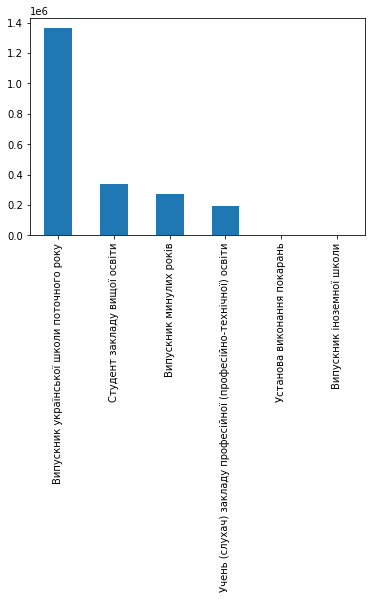

In [15]:
dataset.regtypename_detailed.value_counts().plot(kind='bar')

`tertypename` – type of territory (3 types: 'Village', 'City', 'Urban-type settlement')

In [16]:
pivot_df = dataset.groupby(['tertypename', 'year']).size().unstack()
pivot_df.loc['Total'] = pivot_df.sum()
pivot_df

year,2016,2017,2018,2019,2020,2021,2022
tertypename,,,,,,,
місто,159036,152203,245246,263006,278221,284190,170823
селище міського типу,22075,21465,27032,27775,30326,31515,18767
"селище, село",86891,67221,63409,63032,70752,73618,44514
Total,268002,240889,335687,353813,379299,389323,234104


<AxesSubplot:>

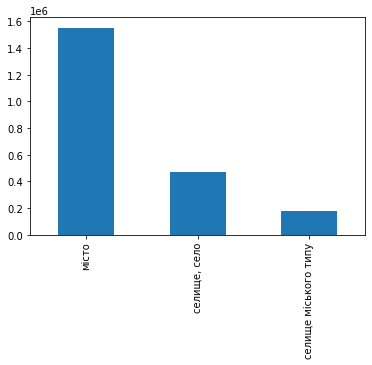

In [17]:
dataset.tertypename.value_counts().plot(kind='bar')

In [18]:
dataset[dataset.tertypename.isnull()]

,outid,birth,sextypename,regname,areaname,tername,regtypename,eoname,eotypename,eoregname,...,ukrlangball12,ukrlangball,ukrlangadaptscale,ukrlangptname,ukrlangptregname,ukrlangptareaname,ukrlangpttername,mathdpalevel,testdate,regtypename_detailed


`classprofilename`– profile of the participant's training class (24 types and two specific types: 'Junior specialit' for students and 'Skilled worker' for graduated people). Full information for the graduates of a Ukrainian school of the current year, partially for college graduates and students of a higher education institution. For else the values are NaN.

In [19]:
dataset.classprofilename.unique()

array([nan, 'Фізико-математичний', 'Історичний', 'Універсальний',
       'Української філології', 'Іноземної філології',
       'Інформаційно-технологічний', 'Інший', 'Математичний',
       'Екологічний', 'Економічний', 'Технологічний', 'Географічний',
       'Біолого-хімічний', 'Спортивний', 'Фізичний',
       'Військово-спортивний', 'Художньо-естетичний', 'Правовий',
       'Біотехнологічний', 'Хіміко-технологічний та агрохімічний',
       'Біолого-фізичний', 'Філософський', 'Фізико-хімічний',
       'Інший(багатопрофільність)', 'Біологічний', 'Молодший спеціаліст',
       'Кваліфікований робітник'], dtype=object)

In [20]:
pivot_df = dataset.groupby(['classprofilename', 'year']).size().unstack()
pivot_df.loc['Total'] = pivot_df.sum()
pivot_df

year,2017,2018,2019,2020,2021
classprofilename,,,,,
Іноземної філології,19812.0,19815.0,20324.0,25409.0,27359.0
Інформаційно-технологічний,7284.0,6662.0,6628.0,7669.0,7567.0
Інший,24024.0,NaN,NaN,NaN,NaN
Інший(багатопрофільність),NaN,8463.0,9455.0,10758.0,9139.0
Історичний,1475.0,8281.0,9386.0,15937.0,15482.0
Біолого-фізичний,311.0,301.0,247.0,207.0,287.0
Біолого-хімічний,5068.0,4746.0,4911.0,4840.0,4016.0
Біологічний,NaN,23.0,196.0,3200.0,3534.0
Біотехнологічний,2180.0,2150.0,2078.0,1174.0,1069.0


<AxesSubplot:>

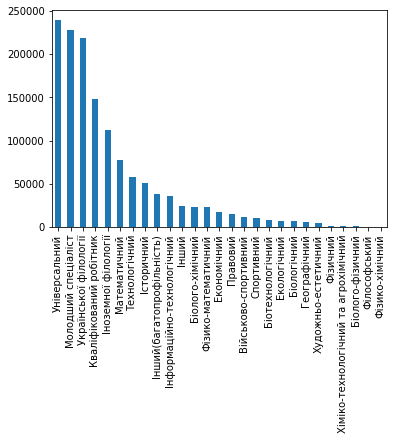

In [21]:
dataset.classprofilename.value_counts().plot(kind='bar')

`classlangname` – participant's language of study (6 types and 'other' category). Full information for the graduates of a Ukrainian school of the current year, partially for college graduates and students of a higher education institution. For else the values are NaN.

In [22]:
dataset.classlangname.unique()

array([nan, 'українська', 'російська', 'молдовська', 'румунська',
       'польська', 'угорська', 'інша'], dtype=object)

In [23]:
pivot_df = dataset.groupby(['classlangname', 'year']).size().unstack()
pivot_df.loc['Total'] = pivot_df.sum()
pivot_df

year,2017,2018,2019,2020,2021
classlangname,,,,,
молдовська,199,200,159,153,121
польська,95,95,107,85,79
російська,18506,17250,16105,14370,6223
румунська,1137,990,915,935,938
угорська,732,782,704,740,686
українська,172115,166045,301680,320164,329668
інша,1,11,18,36,26
Total,192785,185373,319688,336483,337741


<AxesSubplot:>

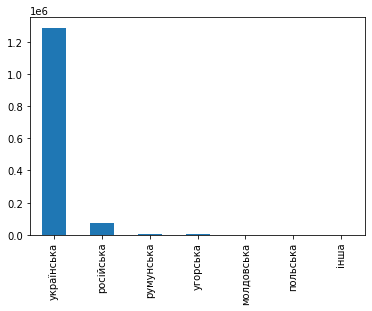

In [24]:
dataset.classlangname.value_counts().plot(kind='bar')

`eoname` – the name of participant's institution of education. Full information for the graduates of a Ukrainian school of the current year, partially for college graduates and students of a higher education institution. For else the values are NaN.

In [25]:
print(f"Number of unique eoname: {len(dataset.eoname.unique())}")

Number of unique eoname: 27338


`eotypename` – type of educational institution (30 types: 'Lyceum', 'Gymnasium', etc). Full information for the graduates of a Ukrainian school of the current year, partially for college graduates and students of a higher education institution. For else the values are NaN.

In [26]:
print(dataset.eotypename.unique())

['колегіум' 'середня загальноосвітня школа' nan 'спеціалізована школа'
 'навчально-виховний комплекс' 'вечірня (змінна) школа' 'ліцей'
 'середня загальноосвітня школа-інтернат' 'гімназія'
 'спеціалізована школа-інтернат' 'загальноосвітня санаторна школа'
 'Пеніціарна установа' 'спеціальна загальноосвітня школа-інтернат' 'колеж'
 'спеціальна загальноосвітня школа' 'школа соціальної реабілітації'
 'вищий навчальний заклад I-II рівнів акредитації'
 "навчально-виховне об'єднання" 'професійний ліцей відповідного профілю'
 'вище професійне училище'
 'професійно-технічне училище відповідного профілю'
 'центр професійно-технічної освіти'
 'вище художнє професійно-технічне училище' 'центр професійної освіти'
 'коледж' 'центр підготовки і перепідготовки робітничих кадрів'
 'навчально-реабілітаційний центр' 'заклад вищої освіти'
 'заклад фахової передвищої освіти'
 'заклад професійної (професійно-технічної) освіти' 'колегіум/колеж'
 'мистецький ліцей' 'Пенітенціарна установа' 'науковий ліцей'
 'л

In [27]:
pivot_df = dataset.groupby(['eotypename', 'year']).size().unstack()
pivot_df.loc['Total'] = pivot_df.sum()
pivot_df

year,2016,2017,2018,2019,2020,2021,2022
eotypename,,,,,,,
Пенітенціарна установа,NaN,NaN,NaN,NaN,NaN,NaN,26.0
Пеніціарна установа,385.0,NaN,NaN,NaN,NaN,NaN,NaN
вечірня (змінна) школа,1013.0,638.0,634.0,482.0,508.0,269.0,89.0
вище професійне училище,NaN,NaN,12865.0,14613.0,14003.0,NaN,NaN
вище художнє професійно-технічне училище,NaN,NaN,574.0,692.0,571.0,NaN,NaN
вищий навчальний заклад I-II рівнів акредитації,1.0,NaN,75987.0,NaN,NaN,NaN,NaN
"військовий (військово-морський, військово-спортивний) ліцей",NaN,NaN,NaN,NaN,NaN,NaN,107.0
гімназія,16444.0,16568.0,16010.0,15212.0,16437.0,16661.0,12001.0
загальноосвітня санаторна школа,272.0,256.0,315.0,327.0,481.0,368.0,272.0


<AxesSubplot:>

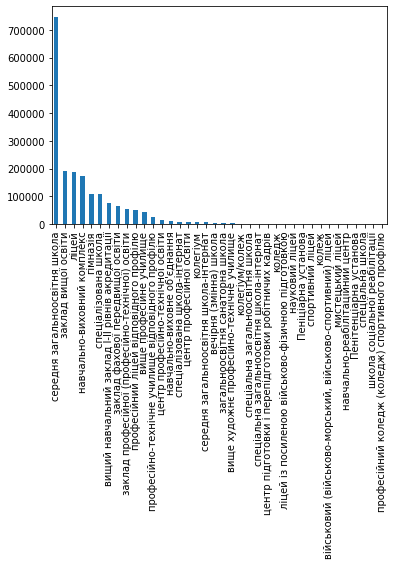

In [28]:
dataset.eotypename.value_counts().plot(kind='bar')

`eoregname` – region where the educational institution is located (same list as in regname). Full information for the graduates of a Ukrainian school of the current year, partially for college graduates and students of a higher education institution. For else the values are NaN.

In [29]:
dataset.eoregname.unique()

array(['Запорізька область', 'Хмельницька область', nan,
       'Чернівецька область', 'Донецька область', 'Тернопільська область',
       'Кіровоградська область', 'Одеська область',
       'Дніпропетровська область', 'Львівська область',
       'Івано-Франківська область', 'Харківська область',
       'Черкаська область', 'Волинська область', 'Полтавська область',
       'Рівненська область', 'Вінницька область', 'Чернігівська область',
       'Київська область', 'Закарпатська область', 'м.Київ',
       'Житомирська область', 'Миколаївська область',
       'Херсонська область', 'Луганська область', 'Сумська область'],
      dtype=object)

In [30]:
pivot_df = dataset.groupby(['eoregname', 'year']).size().unstack()
pivot_df.loc['Total'] = pivot_df.sum()
pivot_df

year,2016,2017,2018,2019,2020,2021,2022
eoregname,,,,,,,
Івано-Франківська область,7144,6965,12045,12638,13426,13530,7561
Волинська область,6861,6355,10525,10621,10730,11281,6491
Вінницька область,8060,7387,13409,14111,14343,14020,8508
Дніпропетровська область,15582,14741,21544,26086,28072,28103,16869
Донецька область,8722,8017,12831,13499,14191,13765,5828
Житомирська область,7037,6516,10644,10749,11248,11342,6816
Закарпатська область,8265,8324,11325,11680,12059,12272,5834
Запорізька область,8317,7981,12777,13417,13984,13680,6063
Київська область,8410,8225,11313,11844,13232,14017,10453


<AxesSubplot:>

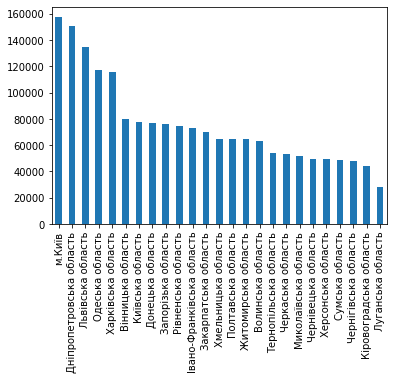

In [31]:
dataset.eoregname.value_counts().plot(kind='bar')

`eoareaname` – district/city where the educational institution is located (same list as areaname). Full information for the graduates of a Ukrainian school of the current year, partially for college graduates and students of a higher education institution. For else the values are NaN.

In [32]:
print(f"Number of unique eoareaname: {len(dataset.eoareaname.unique())}")

Number of unique eoareaname: 841


`eotername` – place where the educational institution is located (same list as tername). Full information for the graduates of a Ukrainian school of the current year, partially for college graduates and students of a higher education institution. For else the values are NaN.

In [33]:
print(f"Number of unique eotername: {len(dataset.eotername.unique())}")

Number of unique eotername: 6990


`eoparent` – the authority to which the educational institution is subordinated. Full information for the graduates of a Ukrainian school of the current year (except 2021), partially for college graduates and students of a higher education institution. For else the values are NaN.

In [34]:
print(f"Number of unique eoparent: {len(dataset.eoparent.unique())}")

Number of unique eoparent: 3800


`year` - individual's participation year

In [35]:
dataset.year.unique()

array([2016, 2017, 2018, 2019, 2020, 2021, 2022])

<AxesSubplot:>

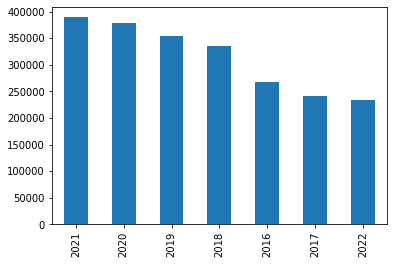

In [36]:
dataset.year.value_counts().plot(kind='bar')

`age` - individual's age at the moment of the participation

In [37]:
dataset.age.unique()

array([18, 21, 17, 19, 32, 16, 20, 26, 29, 31, 22, 24, 23, 39, 35, 50, 25,
       53, 33, 27, 43, 40, 37, 28, 41, 30, 34, 36, 42, 44, 38, 52, 45, 46,
       62, 47, 49, 15, 48, 57, 54, 51, 55, 58, 56, 66, 61, 60, 14, 63, 59,
       64, 69, 67, 70, 65, 76, 68, 71, 13])

In [38]:
pivot_df = dataset.groupby(['age', 'year']).size().unstack()
pivot_df.loc['Total'] = pivot_df.sum()
pivot_df

year,2016,2017,2018,2019,2020,2021,2022
age,,,,,,,
13,NaN,NaN,NaN,NaN,NaN,NaN,3.0
14,1.0,1.0,NaN,NaN,NaN,1.0,1.0
15,20.0,13.0,15.0,21.0,15.0,18.0,14.0
16,1646.0,1710.0,2104.0,2159.0,2193.0,2121.0,1351.0
17,136157.0,134683.0,176474.0,183985.0,197545.0,204782.0,134171.0
...,...,...,...,...,...,...,...
69,NaN,NaN,1.0,NaN,NaN,NaN,1.0
70,NaN,NaN,NaN,1.0,NaN,1.0,1.0
71,NaN,NaN,NaN,NaN,1.0,NaN,NaN


<AxesSubplot:>

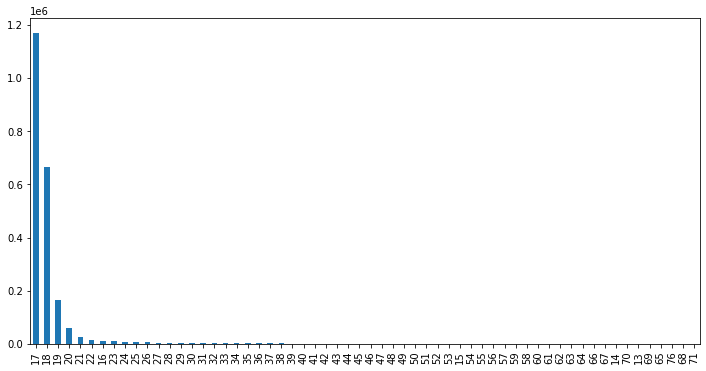

In [39]:
dataset.age.value_counts().plot(kind='bar', figsize=(12, 6))

## Test performance features 

`test_type` - type of test which students passed. Till 2022 - it was EIE; 2022 - NMT

In [40]:
dataset.test_type.unique()

array(['EIE', 'NMT'], dtype=object)

In [41]:
pivot_df = dataset.groupby(['test_type', 'year']).size().unstack()
pivot_df.loc['Total'] = pivot_df.sum()
pivot_df

year,2016,2017,2018,2019,2020,2021,2022
test_type,,,,,,,
EIE,268002.0,240889.0,335687.0,353813.0,379299.0,389323.0,NaN
NMT,NaN,NaN,NaN,NaN,NaN,NaN,234104.0
Total,268002.0,240889.0,335687.0,353813.0,379299.0,389323.0,234104.0


`testdate` - the date when students passed the test. Only for 2022.

In [42]:
dataset.testdate.unique()

array([nan, '02.08.2022', '25.07.2022', '03.08.2022', '28.07.2022',
       '04.08.2022', '29.07.2022', '17.08.2022', '18.08.2022',
       '01.08.2022', '27.07.2022', '22.07.2022', '14.09.2022',
       '26.07.2022'], dtype=object)

In [43]:
pivot_df = dataset.groupby(['testdate', 'year']).size().unstack()
pivot_df.loc['Total'] = pivot_df.sum()
pivot_df

year,2022
testdate,
01.08.2022,21829
02.08.2022,21761
03.08.2022,20302
04.08.2022,15413
14.09.2022,5699
17.08.2022,13827
18.08.2022,11717
22.07.2022,15925
25.07.2022,19266


<AxesSubplot:>

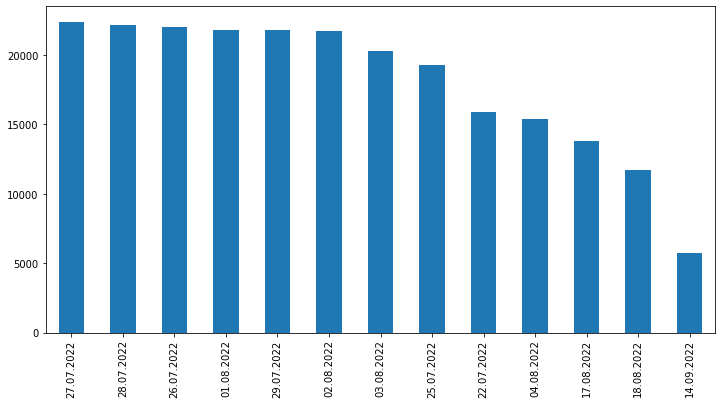

In [44]:
dataset.testdate.value_counts().plot(kind='bar', figsize=(12, 6))

## Test subjects

There are several subjects to choose from:
- ukr (ukrainian language)
- ukrlang (ukrainian language and literature)
- hist (Ukrainian history)
- math (Mathematics)
- phys (Physics)
- chem (Chemistry)
- bio (biology)
- geo (geography)
- eng (English language)
- fra (French language)
- deu (Deutch language)
- spa (Spanish language)
- rus (russian language)

We will decode one of them as `subj` instead of one of the 13 subjects mentioned above.

For each subject we have the different features that are described below.

### Test name

`subjtest` - the name of the subject (corresponding name or nan if the participant didn't choose to take it)

In [45]:
# dataset[dataset["histtest"] == "Математика"].unique()
# dataset[(dataset["mathtest"] == "Історія України") & (dataset["mathteststatus"] == 'Не подолав поріг')]
subj_names = ["ukr", "ukrlang", "hist", "math", "phys", "chem", "bio", "geo", "eng", "fra", "deu", "spa", "rus"]
test_names = [subj + "test" for subj in subj_names]
test_names
dataset[test_names].apply(pd.Series.value_counts)

,ukrtest,ukrlangtest,histtest,mathtest,phystest,chemtest,biotest,geotest,engtest,fratest,deutest,spatest,rustest
Іспанська мова,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1005.0,NaN
Історія України,NaN,NaN,1339296.0,234104.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Англійська мова,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,618285.0,NaN,NaN,NaN,NaN
Біологія,NaN,NaN,NaN,NaN,NaN,NaN,572042.0,NaN,NaN,NaN,NaN,NaN,NaN
Географія,NaN,NaN,NaN,NaN,NaN,NaN,NaN,596231.0,NaN,NaN,NaN,NaN,NaN
Математика,NaN,NaN,234104.0,995950.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Німецька мова,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14634.0,NaN,NaN
Російська мова,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5572.0
Українська мова,NaN,608067.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Українська мова і література,1809724.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Test Status

`subjteststatus` – the result of the test ('The score threshold wasn't reached', 'Test passed', 'No attendance',
 'Test results were cancelled', '100-200 wasn't selected', or NaN if the participant didn't choose to take it)

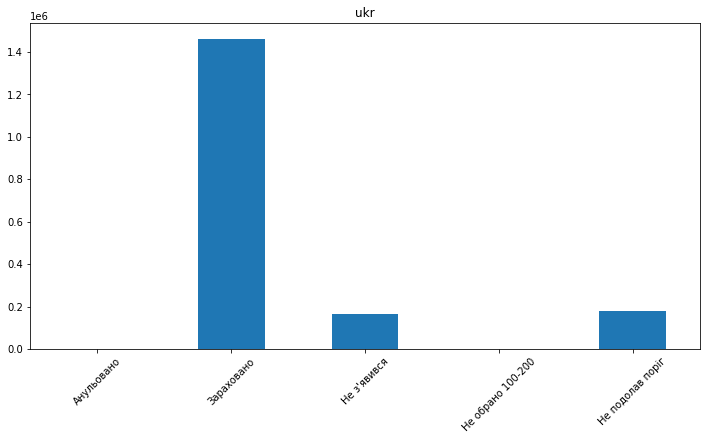

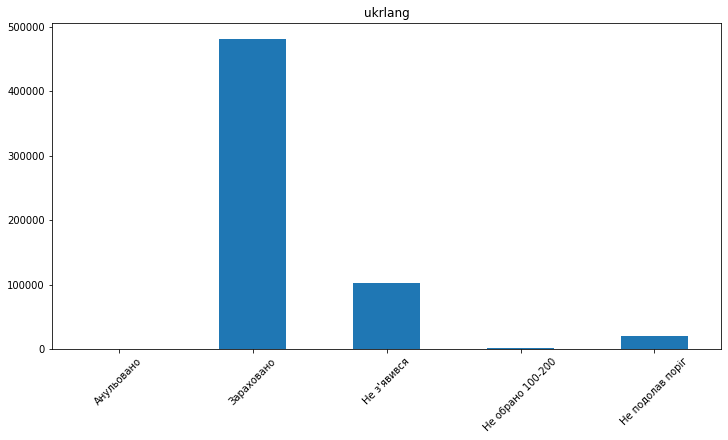

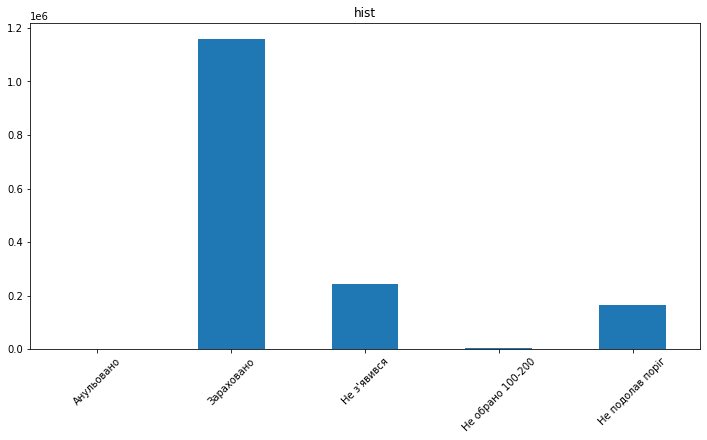

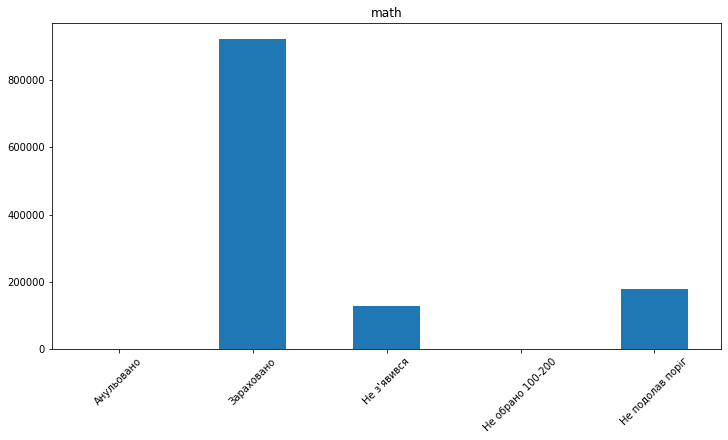

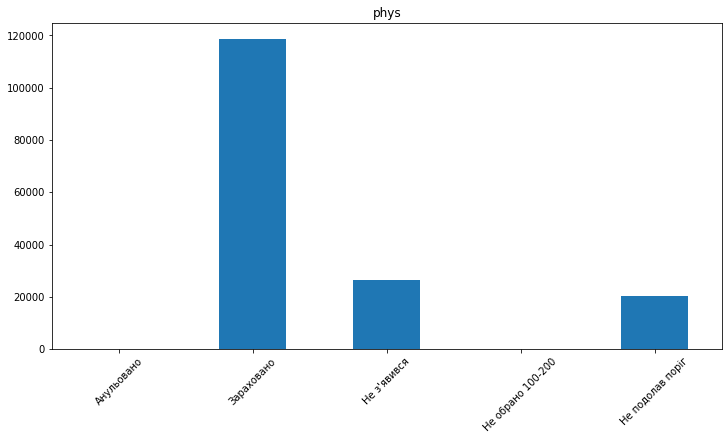

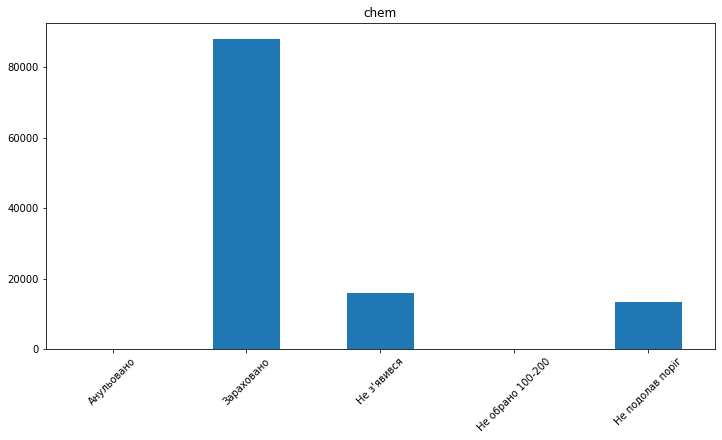

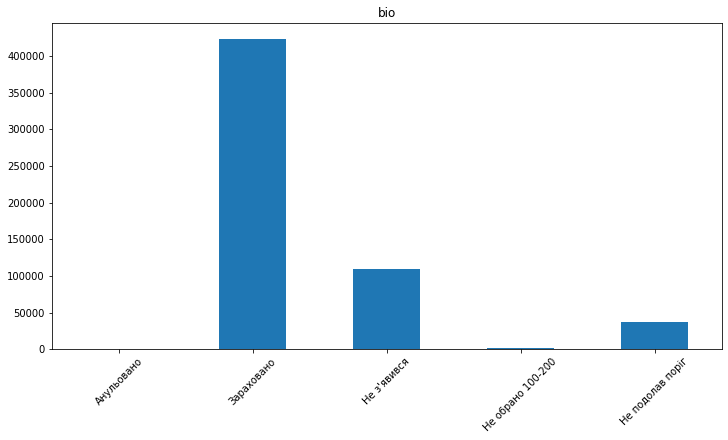

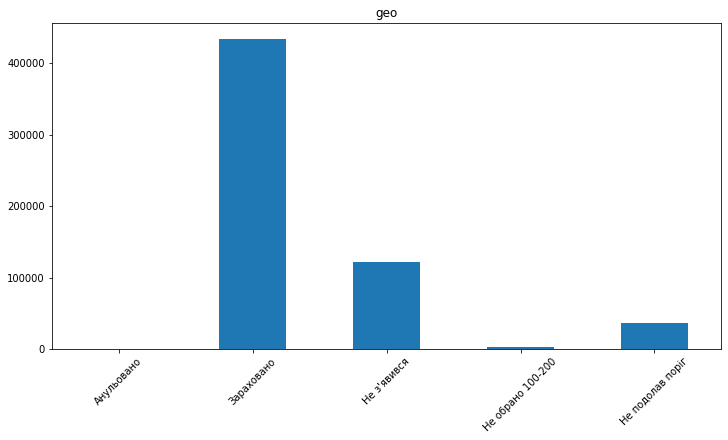

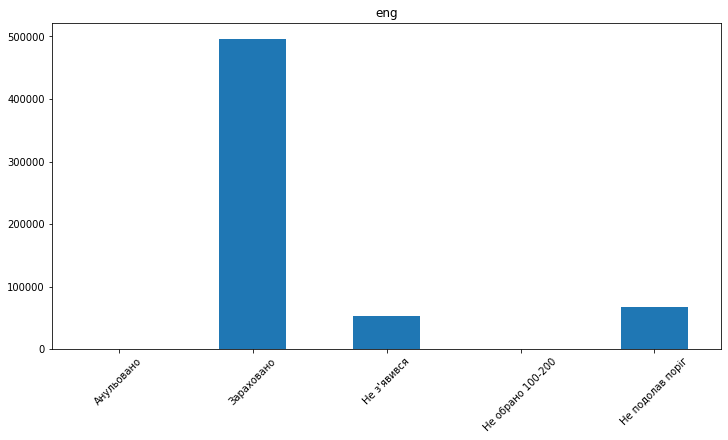

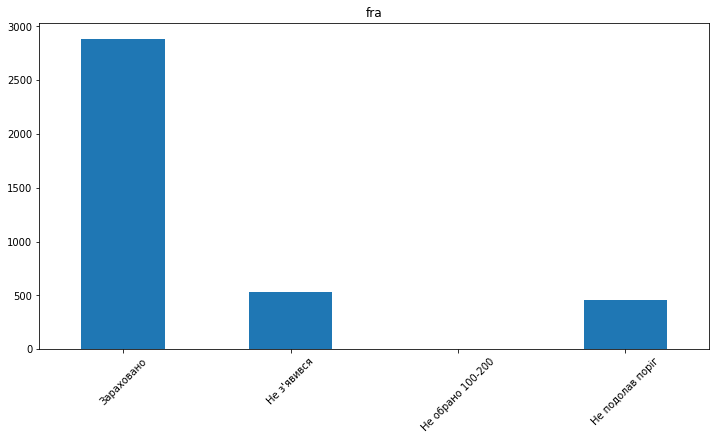

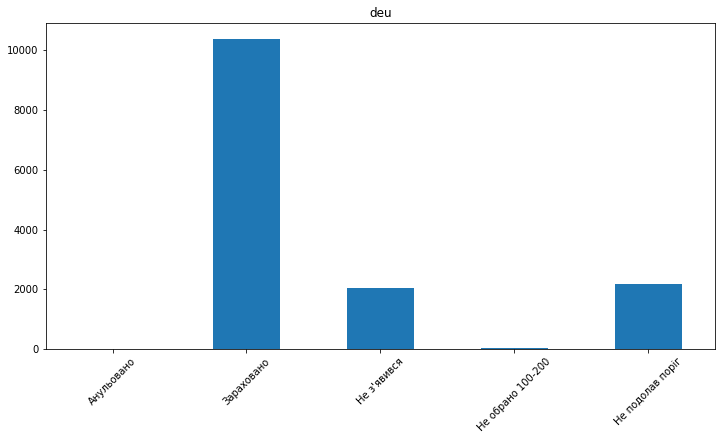

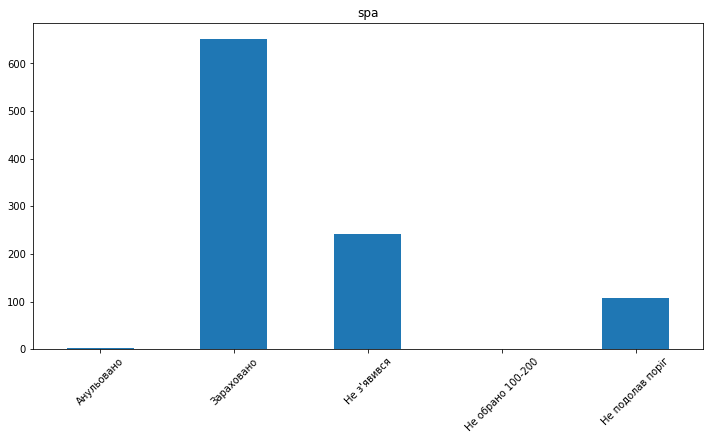

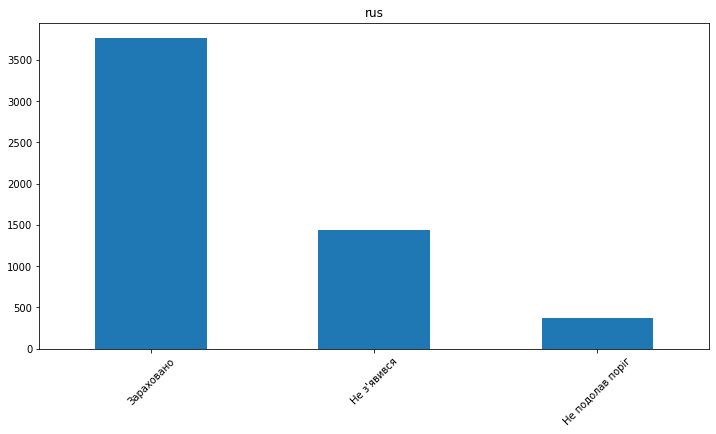

In [46]:
subj_names = ["ukr", "ukrlang", "hist", "math", "phys", "chem", "bio", "geo", "eng", "fra", "deu", "spa", "rus"]
test_statuses = []
for subj in subj_names:
    plt.figure()
    test_status = dataset[f"{subj}teststatus"].value_counts()
    test_status.sort_index().plot(kind='bar', figsize=(12, 6), rot=45)
    plt.title(subj)
    plt.show()
    test_statuses.append(test_status)

In [47]:
result_test_statuses = test_statuses[0]
for i in range(1, len(test_statuses)):
    result_test_statuses = result_test_statuses.add(test_statuses[i], fill_value=0)

<AxesSubplot:>

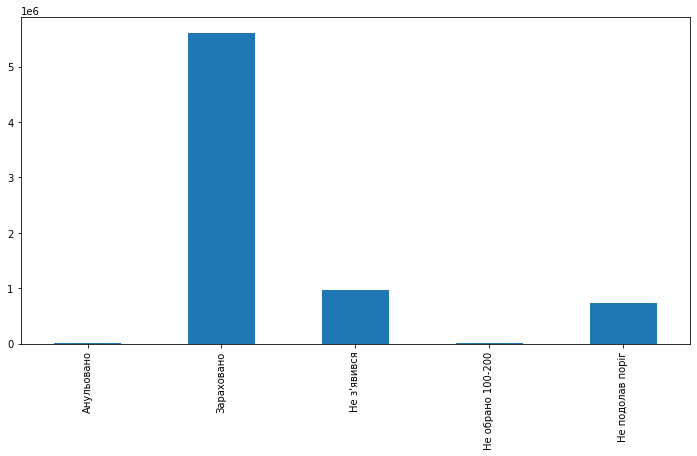

In [48]:
result_test_statuses.plot(kind='bar', figsize=(12, 6))

Most of the tests are successfully passed. There is approximately the same number of people who did not reach the score threshold and did not come to the test. The are almost no tests that were cancelled or where 100-200 wasn't selected.

### Raw Subject scores

`subjball`– raw score of the corresponding subject for participants with statuses: 'Test passed' and 'The score threshold wasn't reached' by subjteststatus (for else is NaN).

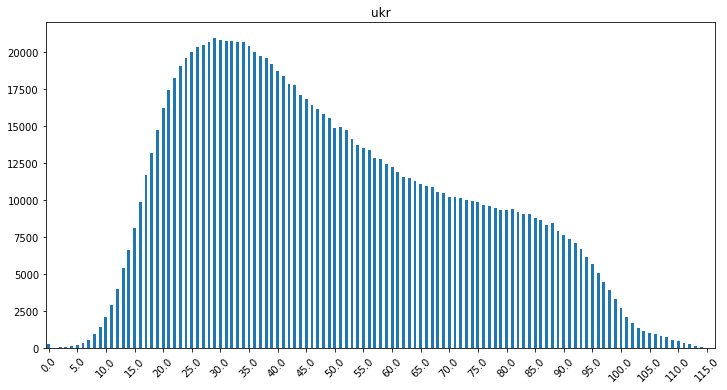

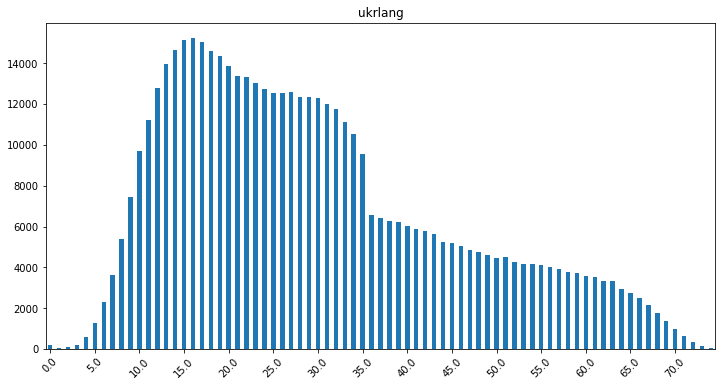

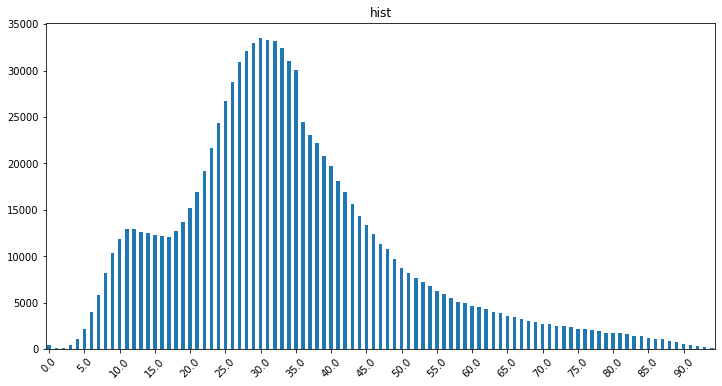

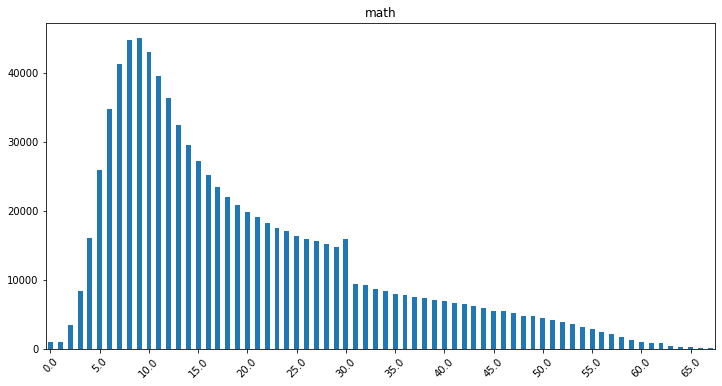

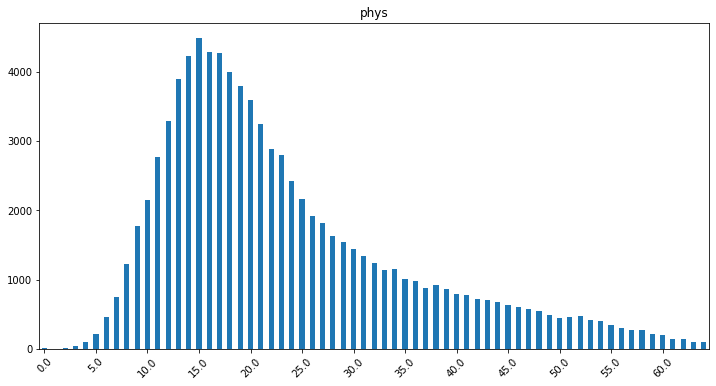

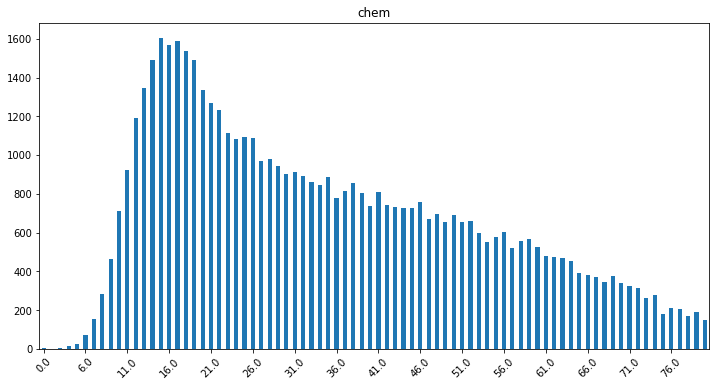

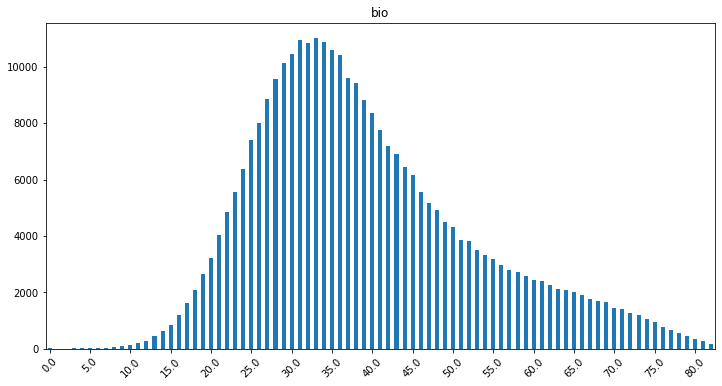

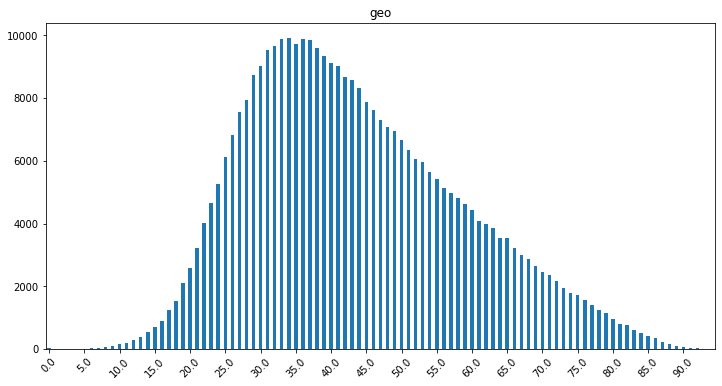

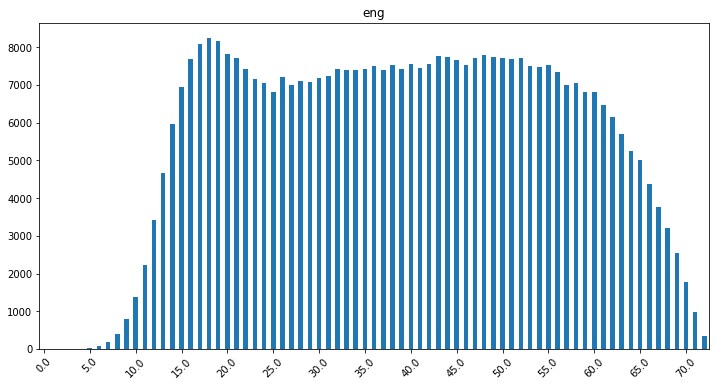

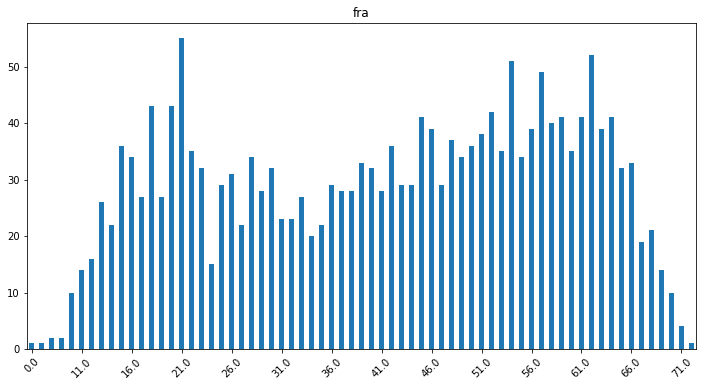

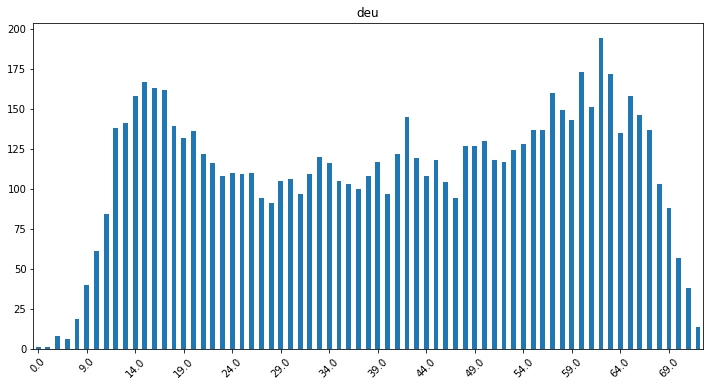

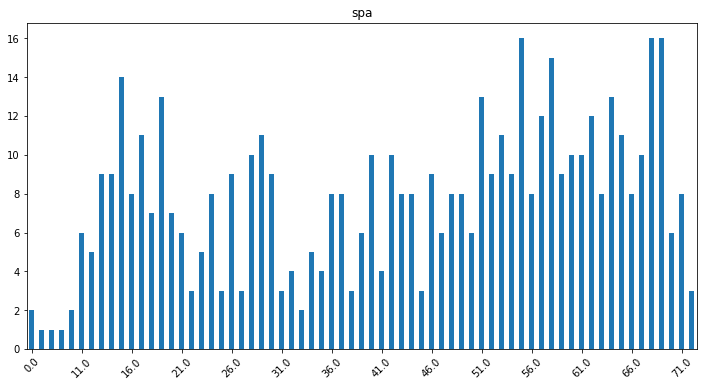

In [49]:
subj_names_ball = ["ukr", "ukrlang", "hist", "math", "phys", "chem", "bio", "geo", "eng", "fra", "deu", "spa"]
for subj in subj_names_ball:
    plt.figure()
    dataset[f"{subj}ball"].value_counts().sort_index().plot(kind='bar', figsize=(12, 6), rot=45)
    plt.title(subj)
    ticks, labels = plt.xticks()
    plt.xticks(ticks[::5], labels[::5])
    plt.show()

### Subject scores in 100-ball scale

`subjball100`- scale score from 100 to 200 of the corresponding subject for participants with statuses: 'Test passed' and 'The score threshold wasn't reached' by subjteststatus (for else is NaN).

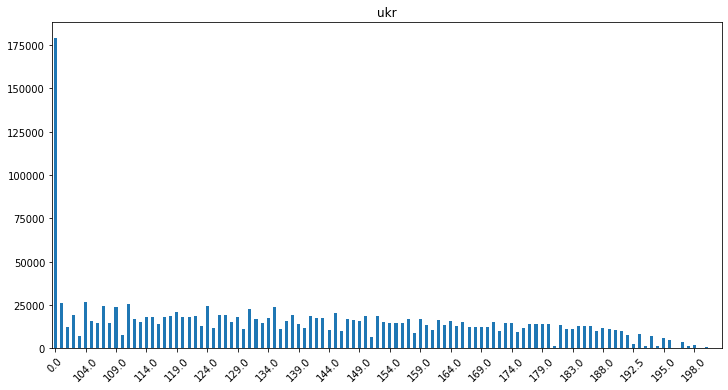

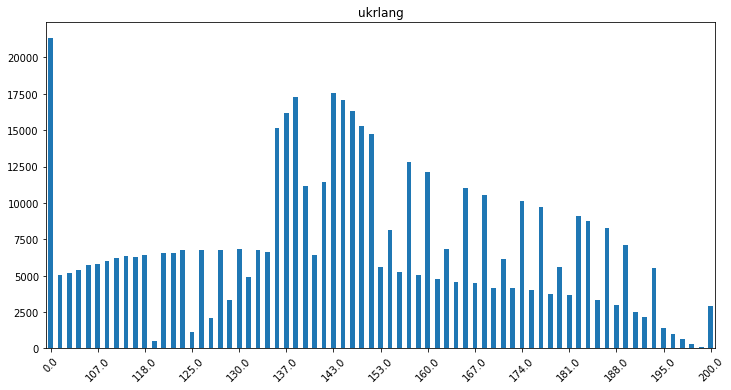

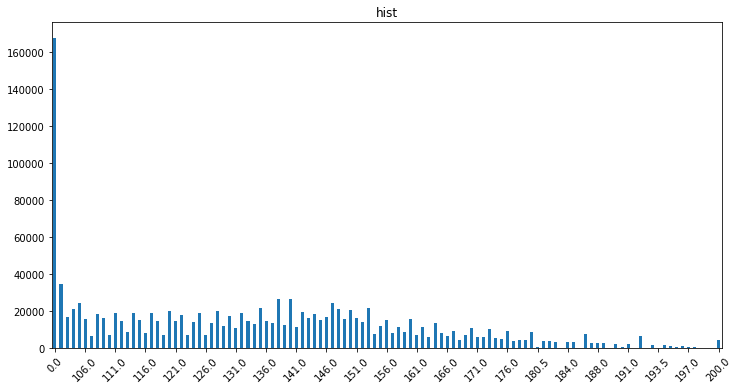

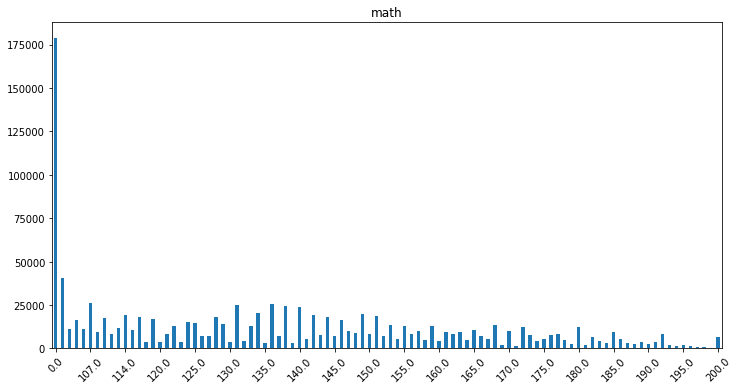

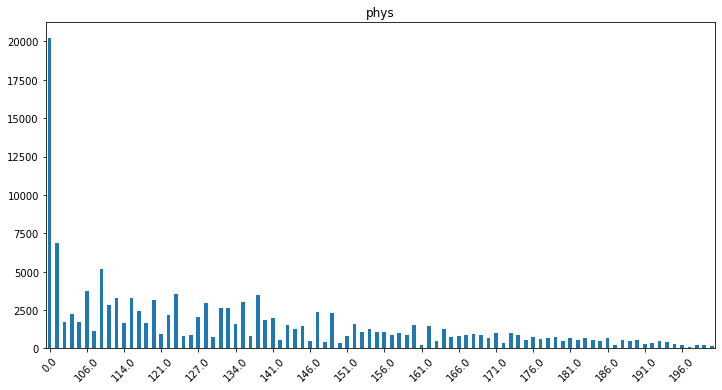

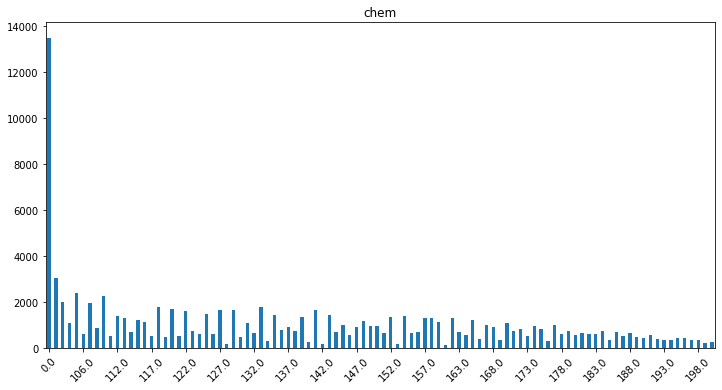

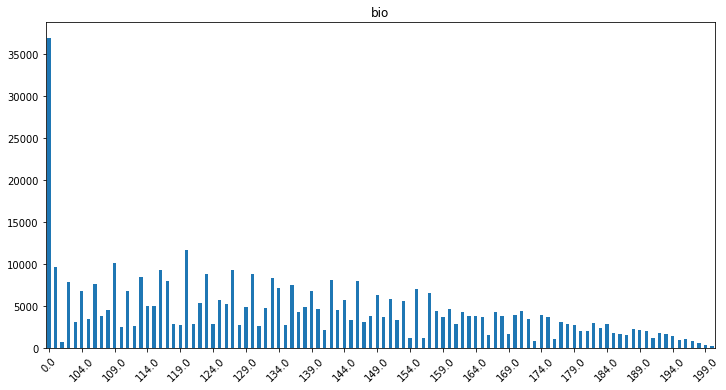

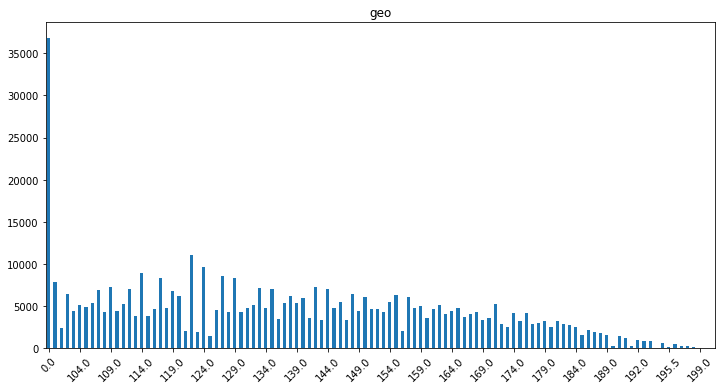

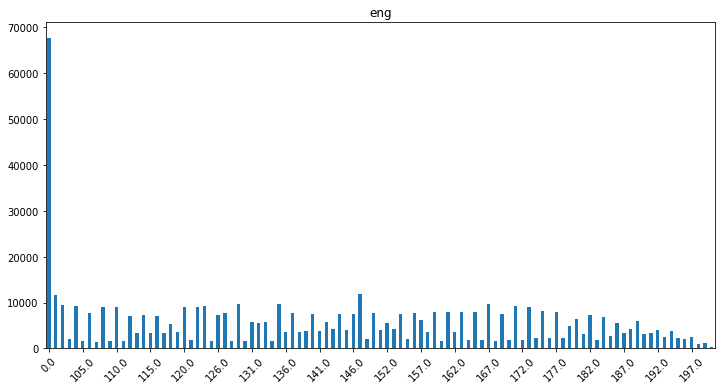

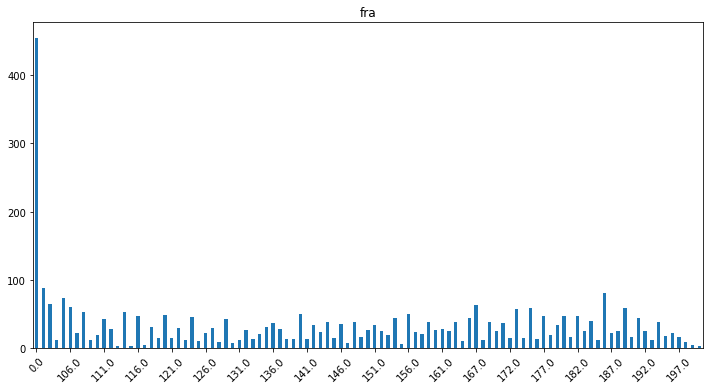

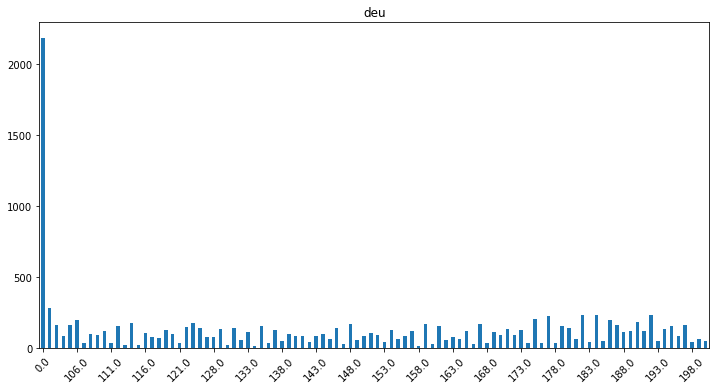

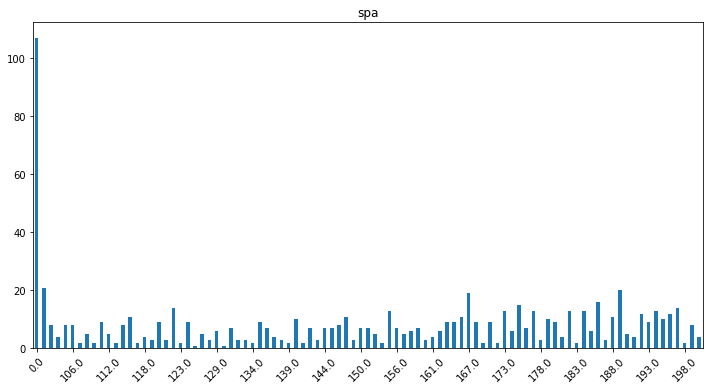

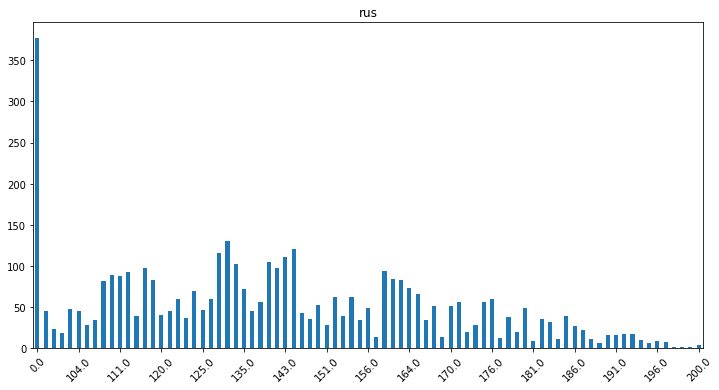

In [50]:
for subj in subj_names:
    plt.figure()
    dataset[f"{subj}ball100"].value_counts().sort_index().plot(kind='bar', figsize=(12, 6), rot=45)
    plt.title(subj)
    ticks, labels = plt.xticks()
    plt.xticks(ticks[::5], labels[::5])
    plt.show()

There are many tests with 0 as score in 100 scale. Those are the tests that were not passed. Let's see the distribution of tests that were passed.

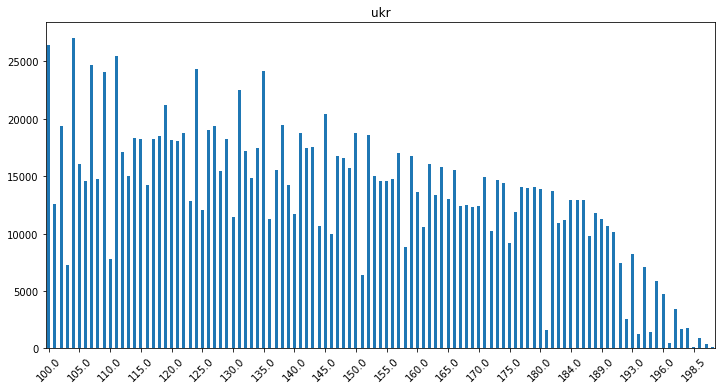

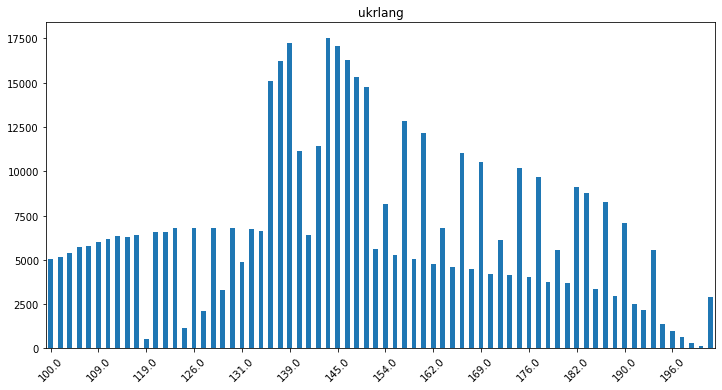

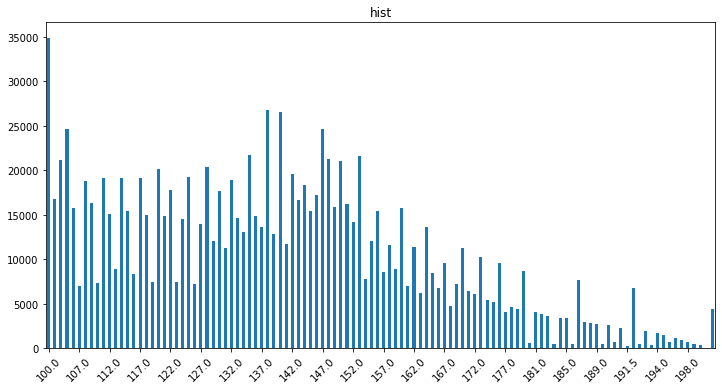

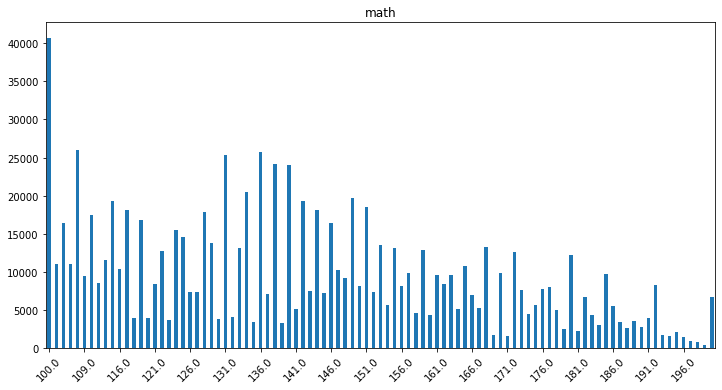

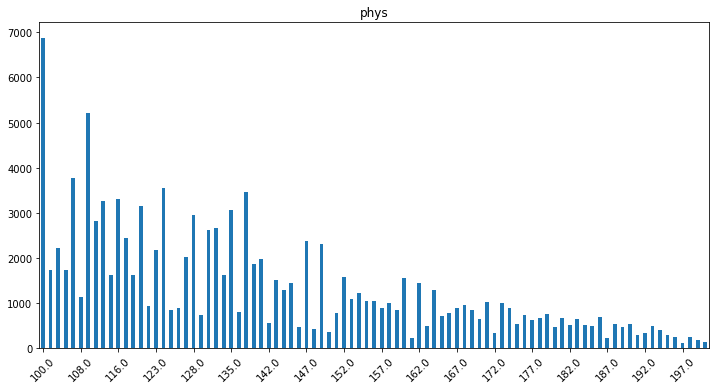

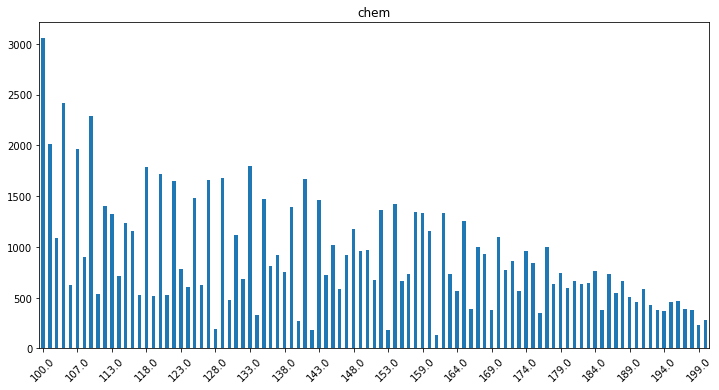

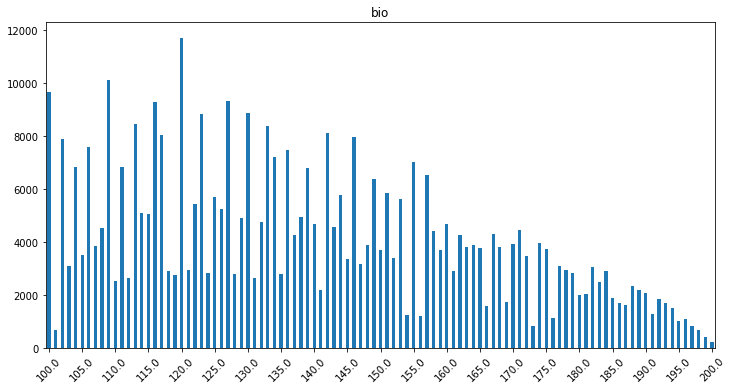

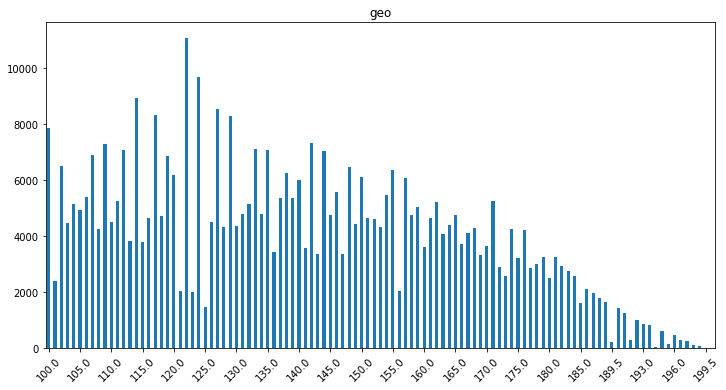

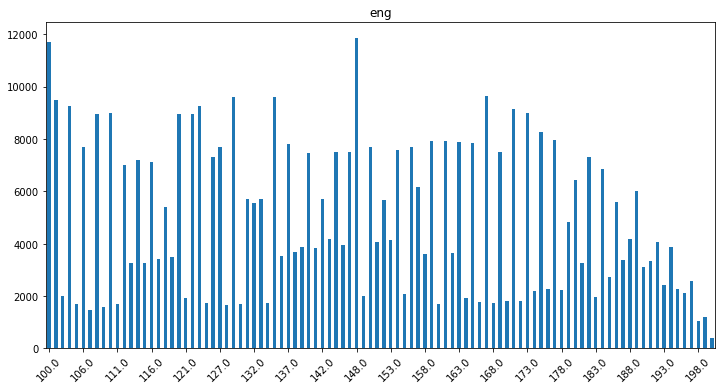

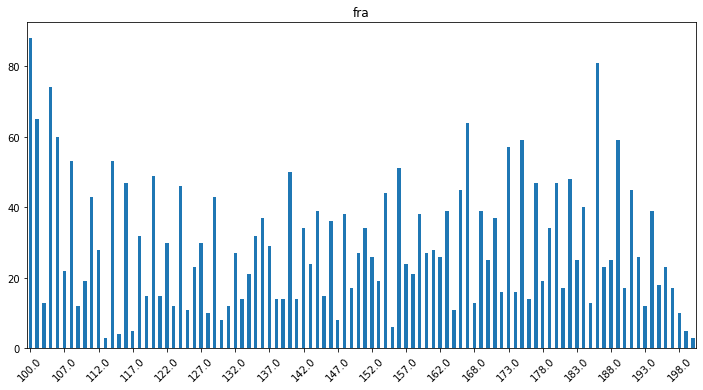

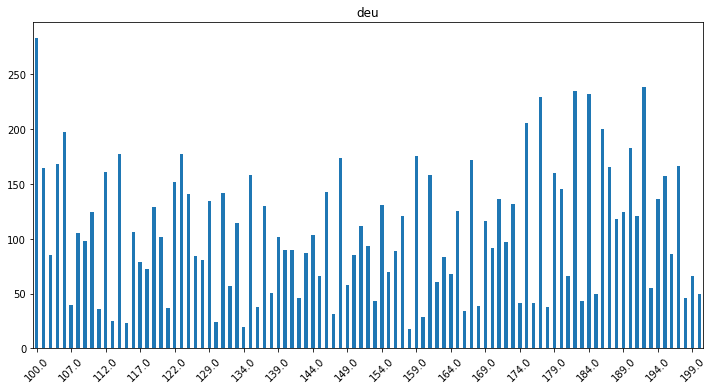

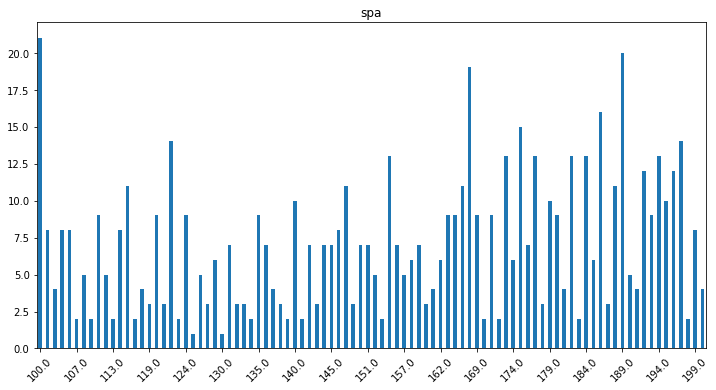

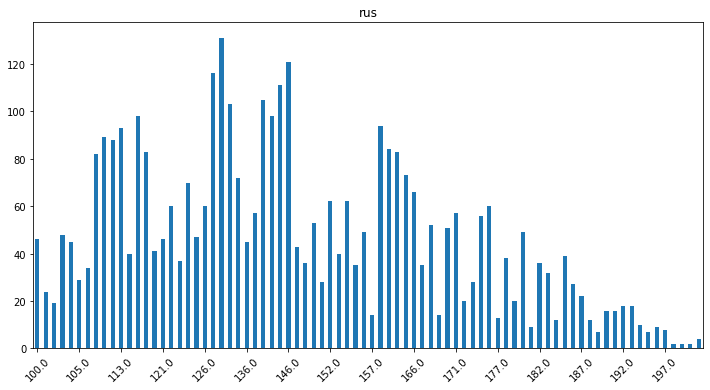

In [51]:
for subj in subj_names:
    plt.figure()
    dataset[f"{subj}ball100"].value_counts().sort_index().drop(0).plot(kind='bar', figsize=(12, 6), rot=45)
    plt.title(subj)
    ticks, labels = plt.xticks()
    plt.xticks(ticks[::5], labels[::5])
    plt.show()

100-ball scale is needed for final EIE/NMT score. It is taken into account in university applications.

### Subject scores in 12-ball scale

`subjball12`- scale score from 0 to 12 of the corresponding subject for participants with statuses: 'Test passed' and 'The score threshold wasn't reached' by subjteststatus (for else is NaN).

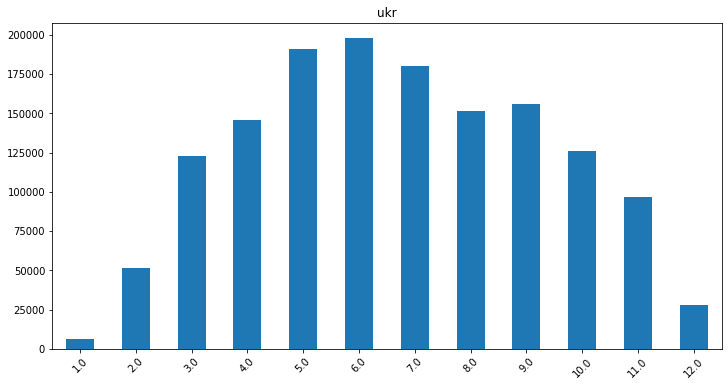

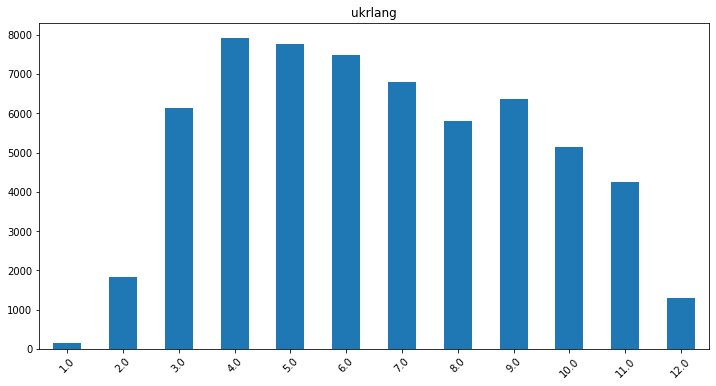

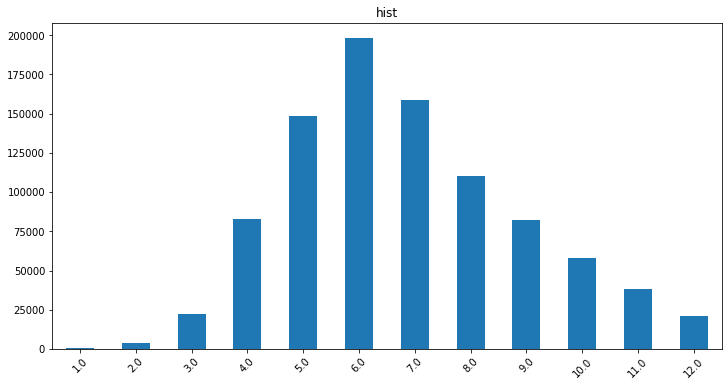

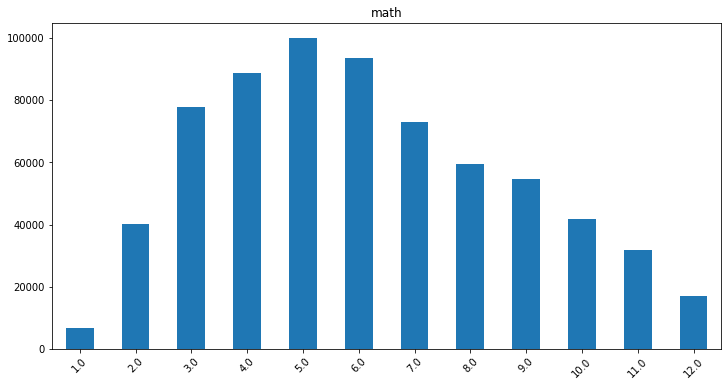

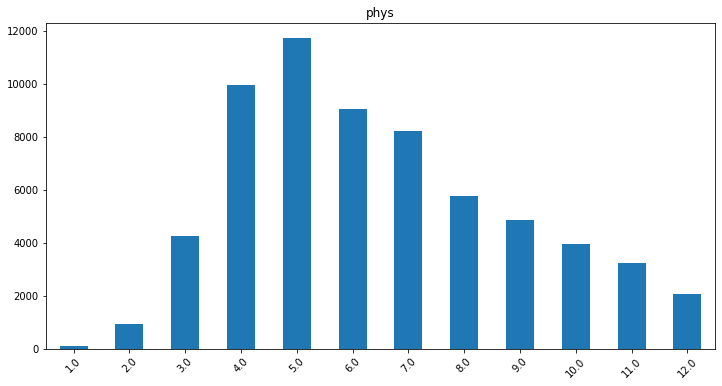

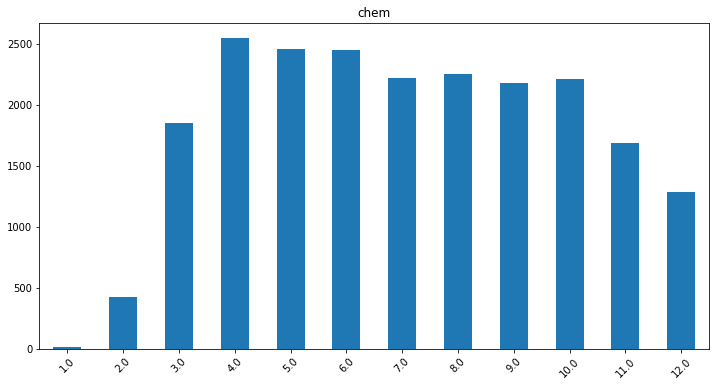

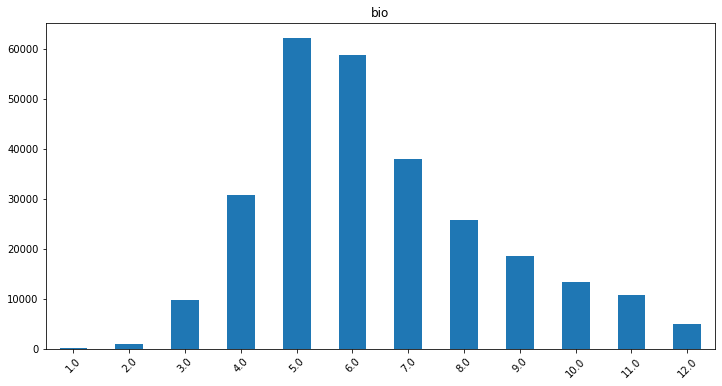

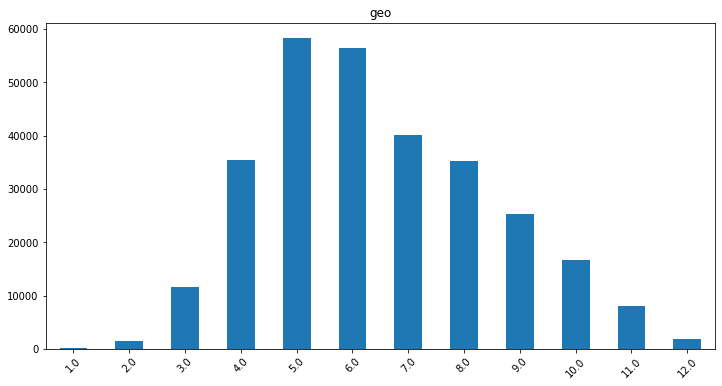

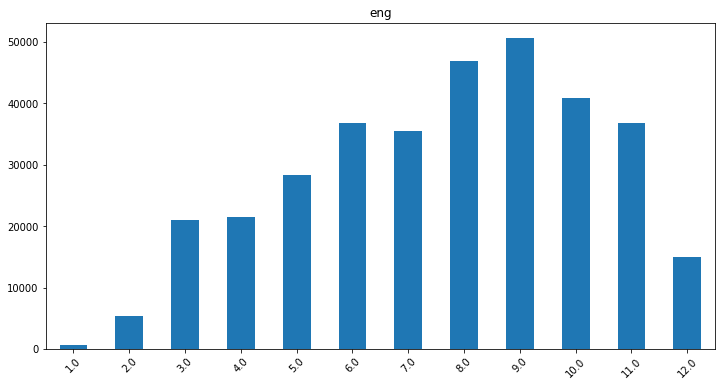

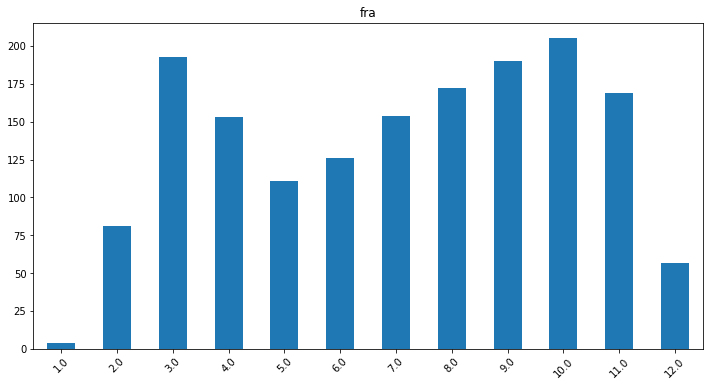

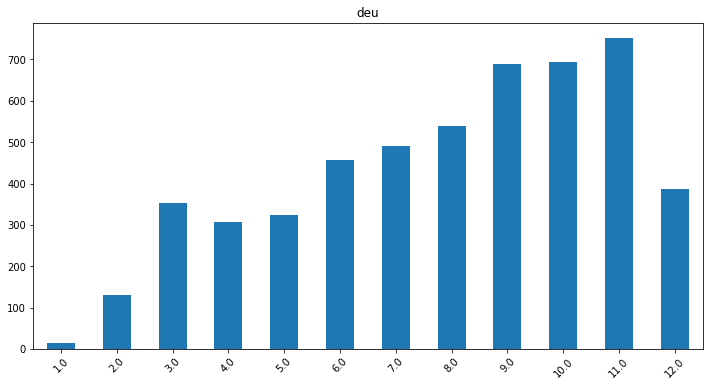

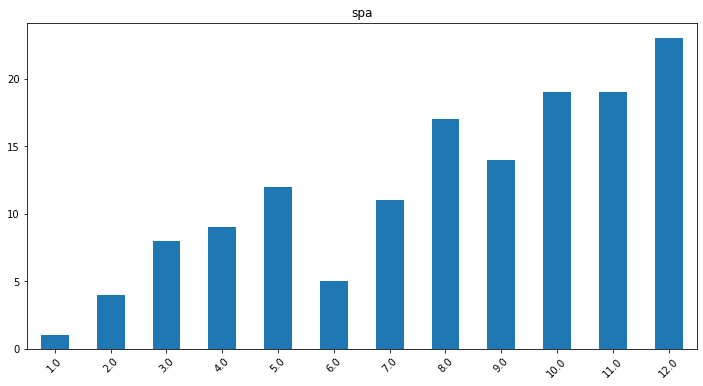

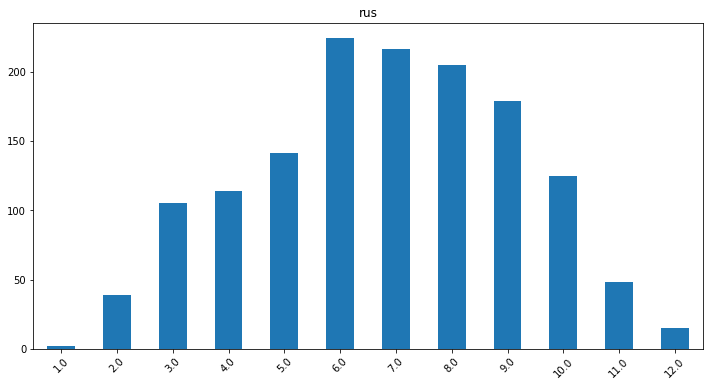

In [52]:
for subj in subj_names:
    plt.figure()
    dataset[f"{subj}ball12"].value_counts().sort_index().plot(kind='bar', figsize=(12, 6), rot=45)
    plt.title(subj)
    plt.show()

This 12-ball scale is needed for DPA (exam to graduate school). The score on EIE is converted to DPA 12-ball scale to get the grade for the DPA exam.

### Place of conducting the exam

`subjptname`– the place of conducting the ZNO (corresponding name or nan if the participant didn't choose to take it)

In [53]:
all_centers = set()
for subj in subj_names:
    curr_test_centers = dataset[f'{subj}ptname'].unique()
    all_centers.update(set(curr_test_centers))
    print(f"Number of unique centers for conducting exam for {subj}: {len(curr_test_centers)}")
print(f"Number of unique centers for conducting exam total: {len(all_centers)}")

Number of unique centers for conducting exam for ukr: 2992
Number of unique centers for conducting exam for ukrlang: 1670
Number of unique centers for conducting exam for hist: 2574
Number of unique centers for conducting exam for math: 2271
Number of unique centers for conducting exam for phys: 457
Number of unique centers for conducting exam for chem: 338
Number of unique centers for conducting exam for bio: 1308
Number of unique centers for conducting exam for geo: 1382
Number of unique centers for conducting exam for eng: 1158
Number of unique centers for conducting exam for fra: 91
Number of unique centers for conducting exam for deu: 92
Number of unique centers for conducting exam for spa: 71
Number of unique centers for conducting exam for rus: 49
Number of unique centers for conducting exam total: 3442


Ukrainian language (and literature), history, and math have the most test centers, because they were mandatory to some extent unlike other subjects that exam takers could choose from.

Test centers often repeat for different subjects (there are just slightly more test centers total than for Ukrainian exam). They repeat for each exam taker for NMT (in 2022), but are usually different for each test of one exam taker for ZNO (before 2022).

### Region of conducting the exam

`subjptregname` – the region where the ZNO is conducted (corresponding name, similar to regname, or nan if the participant didn't choose to take it)

In [54]:
all_regions = set()
for subj in subj_names:
    curr_regions = dataset[f'{subj}ptregname'].unique()
    all_regions.update(set(curr_regions))
    print(f"Number of unique regions for conducting exam for {subj}: {len(curr_regions)}")
print(f"Number of unique regions for conducting exam total: {len(all_regions)}")

Number of unique regions for conducting exam for ukr: 26
Number of unique regions for conducting exam for ukrlang: 27
Number of unique regions for conducting exam for hist: 27
Number of unique regions for conducting exam for math: 27
Number of unique regions for conducting exam for phys: 26
Number of unique regions for conducting exam for chem: 26
Number of unique regions for conducting exam for bio: 26
Number of unique regions for conducting exam for geo: 26
Number of unique regions for conducting exam for eng: 26
Number of unique regions for conducting exam for fra: 25
Number of unique regions for conducting exam for deu: 25
Number of unique regions for conducting exam for spa: 23
Number of unique regions for conducting exam for rus: 25
Number of unique regions for conducting exam total: 28


In [55]:
for subj in subj_names:
    print(f"Region(s) that {subj} was not taken at: {all_regions - set(dataset[f'{subj}ptregname'].unique())}")

Region(s) that ukr was not taken at: {nan, 'Інші країни'}
Region(s) that ukrlang was not taken at: {nan}
Region(s) that hist was not taken at: {nan}
Region(s) that math was not taken at: {nan}
Region(s) that phys was not taken at: {nan, 'Інші країни'}
Region(s) that chem was not taken at: {nan, 'Інші країни'}
Region(s) that bio was not taken at: {nan, 'Інші країни'}
Region(s) that geo was not taken at: {nan, 'Інші країни'}
Region(s) that eng was not taken at: {nan, 'Інші країни'}
Region(s) that fra was not taken at: {nan, 'Київська область', 'Інші країни'}
Region(s) that deu was not taken at: {nan, 'Київська область', 'Інші країни'}
Region(s) that spa was not taken at: {nan, 'Чернігівська область', 'Інші країни', 'Київська область', 'Черкаська область'}
Region(s) that rus was not taken at: {nan, 'Київська область', 'Інші країни'}


In [56]:
all_regions

{nan,
 nan,
 'Івано-Франківська область',
 'Інші країни',
 'Волинська область',
 'Вінницька область',
 'Дніпропетровська область',
 'Донецька область',
 'Житомирська область',
 'Закарпатська область',
 'Запорізька область',
 'Київська область',
 'Кіровоградська область',
 'Луганська область',
 'Львівська область',
 'Миколаївська область',
 'Одеська область',
 'Полтавська область',
 'Рівненська область',
 'Сумська область',
 'Тернопільська область',
 'Харківська область',
 'Херсонська область',
 'Хмельницька область',
 'Черкаська область',
 'Чернівецька область',
 'Чернігівська область',
 'м.Київ'}

Many tests were not taken in "Інші країни" ("Other countries") because this region appeared after full-scale war and NMT in 2022. Only tree tests (ukrlang, history, and math) were added to NMT.

In [57]:
data_2022 = dataset[dataset["year"] == 2022]
len(data_2022['ukrlangptregname'].unique())

23

In [58]:
all_regions - set(data_2022['ukrlangptregname'].unique())

{nan, nan, 'Донецька область', 'Луганська область', 'Херсонська область'}

There are 3 regions where test was not conducted in 2022: Donetsk, Luhansk, Kherson oblast. They were occupied at that time and it was impossible to conduct any tests there due to war.

<AxesSubplot:>

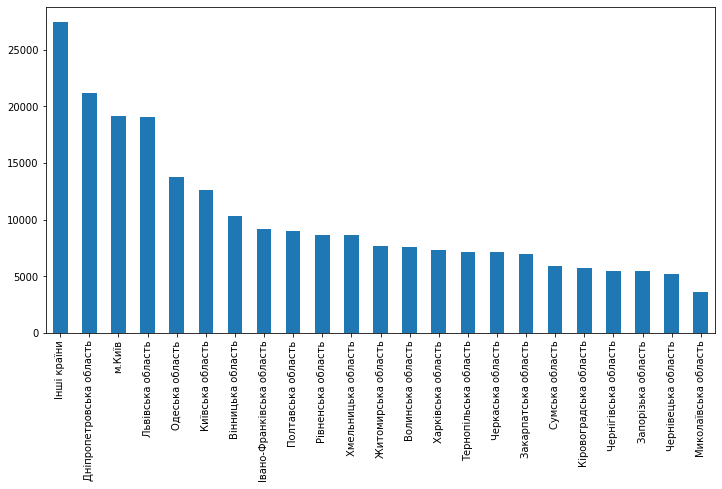

In [59]:
data_2022['ukrlangptregname'].value_counts().plot(kind='bar', figsize=(12, 6))

<AxesSubplot:>

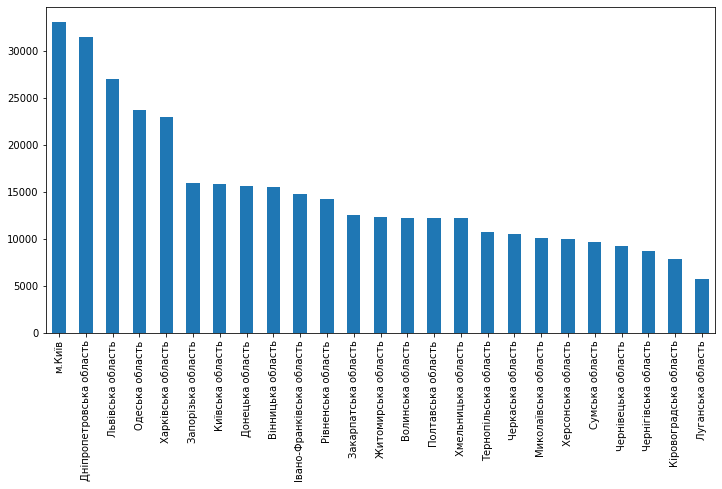

In [60]:
data_eie = dataset[dataset["year"] != 2022]
data_eie['ukrlangptregname'].value_counts().plot(kind='bar', figsize=(12, 6))

<AxesSubplot:>

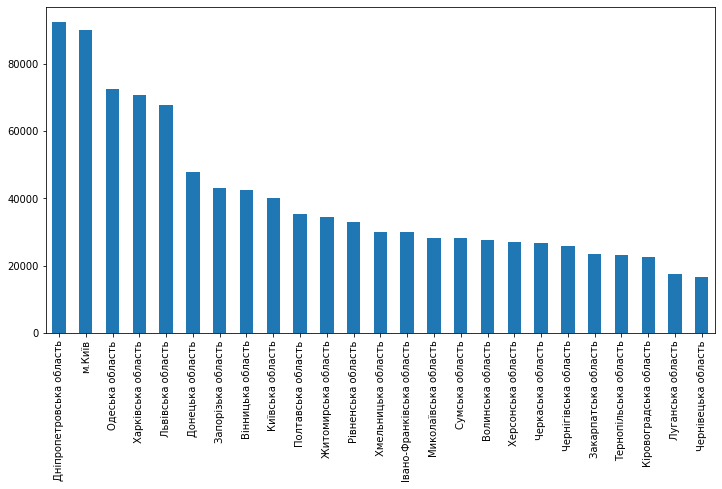

In [61]:
data_eie['mathptregname'].value_counts().plot(kind='bar', figsize=(12, 6))

<AxesSubplot:>

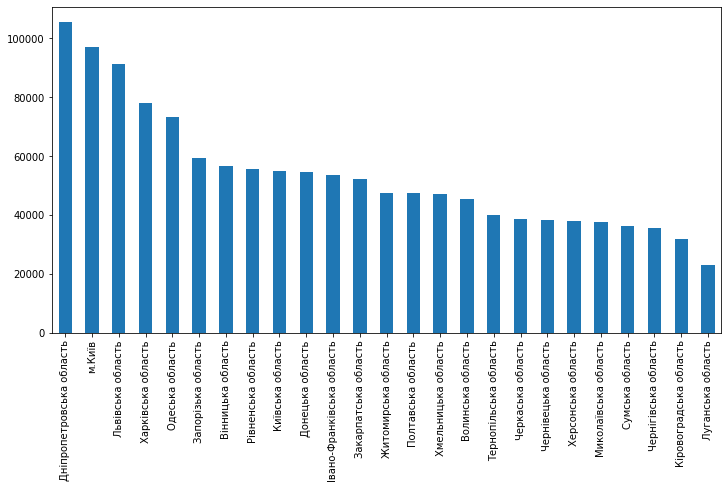

In [62]:
data_eie['histptregname'].value_counts().plot(kind='bar', figsize=(12, 6))

Data before 2022 is different for different subjects, but that is not the case with 2022, because in that year all tests takers took ukrlang, math, and history neccessarily.

### District / City where test center is located

`subjptareaname` – district/city where the ZNO testing center is located (corresponding name, similar to areaname, or nan if the participant didn't choose to take it)

In [63]:
all_areas = set()
for subj in subj_names:
    curr_area = dataset[f'{subj}ptareaname'].unique()
    all_areas.update(set(curr_area))
    print(f"Number of unique areas for conducting exam for {subj}: {len(curr_area)}")
print(f"Number of unique areas for conducting exam total: {len(all_areas)}")

Number of unique areas for conducting exam for ukr: 526
Number of unique areas for conducting exam for ukrlang: 516
Number of unique areas for conducting exam for hist: 642
Number of unique areas for conducting exam for math: 625
Number of unique areas for conducting exam for phys: 131
Number of unique areas for conducting exam for chem: 118
Number of unique areas for conducting exam for bio: 285
Number of unique areas for conducting exam for geo: 288
Number of unique areas for conducting exam for eng: 250
Number of unique areas for conducting exam for fra: 49
Number of unique areas for conducting exam for deu: 53
Number of unique areas for conducting exam for spa: 43
Number of unique areas for conducting exam for rus: 40
Number of unique areas for conducting exam total: 681


### Place where the testing center is located

`subjpttername` – place where the ZNO testing center is located (corresponding name, similar to tername, or nan if the participant didn't choose to take it)

In [64]:
all_ters = set()
for subj in subj_names:
    curr_terr = dataset[f'{subj}pttername'].unique()
    all_ters.update(set(curr_terr))
    print(f"Number of unique territory for conducting exam for {subj}: {len(curr_terr)}")
print(f"Number of unique territories for conducting exam total: {len(all_ters)}")

Number of unique territory for conducting exam for ukr: 507
Number of unique territory for conducting exam for ukrlang: 501
Number of unique territory for conducting exam for hist: 582
Number of unique territory for conducting exam for math: 566
Number of unique territory for conducting exam for phys: 100
Number of unique territory for conducting exam for chem: 90
Number of unique territory for conducting exam for bio: 241
Number of unique territory for conducting exam for geo: 253
Number of unique territory for conducting exam for eng: 208
Number of unique territory for conducting exam for fra: 43
Number of unique territory for conducting exam for deu: 46
Number of unique territory for conducting exam for spa: 37
Number of unique territory for conducting exam for rus: 36
Number of unique territories for conducting exam total: 622


### Adaptation scales

`subjadaptscale` – adaptation scale for tests of Ukrainian language. Is applied to those for whom Ukrainian language is not native.

Values are 7, 4, 3, 0, and nan (if the test was not taken or if there is some missing information like place of taking the exam).

In [65]:
dataset["ukradaptscale"].unique()

array([nan,  0.,  3.,  7.,  4.])

In [66]:
dataset[dataset["ukrlangadaptscale"].isna()][['ukrlangtest', 'ukrlangteststatus', 'ukrlangball100', 'ukrlangball12', 'ukrlangball', 'ukrlangadaptscale', 'ukrlangptname', 'ukrlangptregname']]["ukrlangptname"].unique()

array([nan], dtype=object)

In [67]:
dataset[(dataset["ukrlangadaptscale"] == 0) & (dataset["ukrlangptname"].isna())][['ukrlangtest', 'ukrlangteststatus', 'ukrlangball100', 'ukrlangball12', 'ukrlangball', 'ukrlangadaptscale', 'ukrlangptname', 'ukrlangptregname']]["ukrlangptname"].unique()

array([], dtype=object)

<AxesSubplot:>

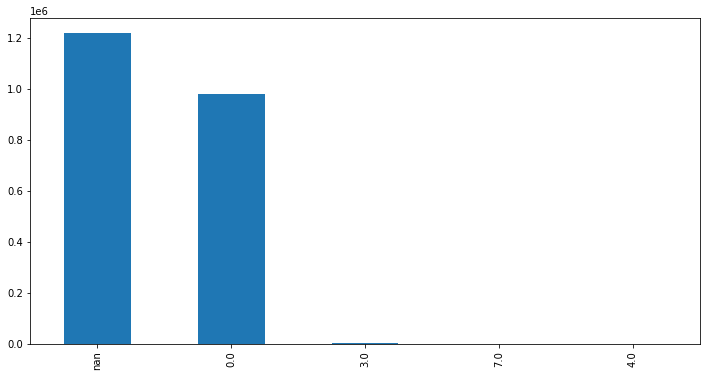

In [68]:
dataset.ukradaptscale.value_counts(dropna=False).plot(kind='bar', figsize=(12, 6))

In [69]:
dataset["ukrlangadaptscale"].unique()

array([nan,  0.,  7.,  3.,  4.])

<AxesSubplot:>

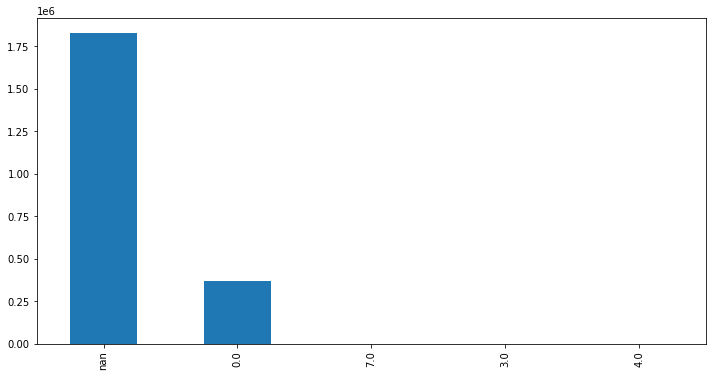

In [70]:
dataset.ukrlangadaptscale.value_counts(dropna=False).plot(kind='bar', figsize=(12, 6))

### DPA levels

`subjdpalevel` – level on which a subject was studied in class (profile or standard). Is applicable to only foreign languages tests and math. Is nan if a student did not take said test.

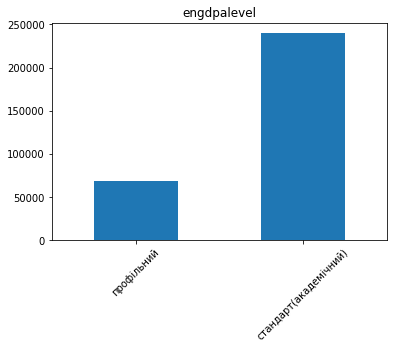

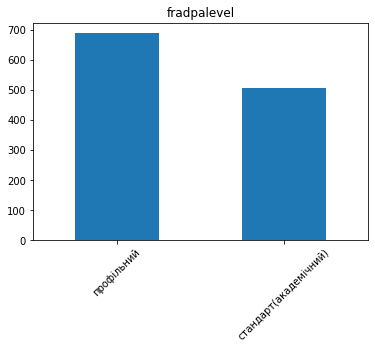

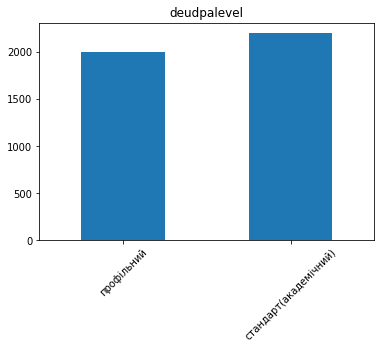

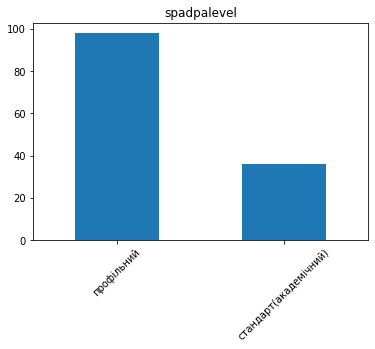

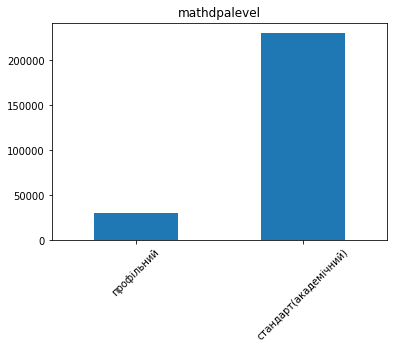

In [71]:
dpa_levels = ['engdpalevel', 'fradpalevel',  'deudpalevel',  'spadpalevel', 'mathdpalevel']
for subj in dpa_levels:
    plt.figure()
    dataset[subj].value_counts().sort_index().plot(kind='bar', rot=45)
    plt.title(subj)
    plt.show()

Most of people who take English and math tests study in standard classes, while most people who take Spanish and French tests study in profile classes. With German the distribution is approximately 50/50, however, most people study in standard classes. That is because Spanish and French are relatively rare subjects to study, so most people study them in profile classes. English and math are subjects that are studied in every school, and test takers do not neccessarily need to study in profile classes to take them. While German is less spread than math or English, it can often be studied in non-profile classes.

# Information about `None` values in dataset

In [72]:
for cols in dataset.columns:
    print(cols, ':', end=' ')
    if len(dataset[cols].unique())>6:
        print('{ number:', len(dataset[cols].unique()), ', nan:', dataset[cols].isnull().sum(),'}')
    else:
        print(dataset[cols].unique(), ', nan:', dataset[cols].isnull().sum())

outid : { number: 2201117 , nan: 0 }
birth : { number: 62 , nan: 0 }
sextypename : ['чоловіча' 'жіноча'] , nan: 0
regname : { number: 25 , nan: 0 }
areaname : { number: 603 , nan: 0 }
tername : { number: 18583 , nan: 0 }
regtypename : ['Випускник української школи поточного року' 'Випускник минулих років'
 'Учень коледжу закладу професійної (професійно-технічної) або вищої освіти'
 'Установа виконання покарань' 'Випускник іноземної школи'] , nan: 0
eoname : { number: 27338 , nan: 313294 }
eotypename : { number: 39 , nan: 313294 }
eoregname : { number: 26 , nan: 313294 }
eoareaname : { number: 841 , nan: 313294 }
eotername : { number: 6990 , nan: 313294 }
eoparent : { number: 3800 , nan: 316956 }
ukrtest : ['Українська мова і література' nan] , nan: 391393
ukrteststatus : ['Зараховано' "Не з'явився" 'Не подолав поріг' nan 'Анульовано'
 'Не обрано 100-200'] , nan: 391393
ukrball100 : { number: 111 , nan: 559008 }
ukrball12 : { number: 13 , nan: 747988 }
ukrptname : { number: 2992 , nan: 